### Final Project 

 # "CUSTOMER SEGMENTATION"

#### By Suci Aulya Putri


# Use Case Summary

**Objective Statement:**
1. Get business insight about how many product sold every month.
2. Get business insight about how much customer spend their money every month.
3. Get business insight about how many customers make transactions each month.
4. Get business insight about how much is the frequency of transactions in months, days, and hours.
5. Get business insight about the most popular products.
6. Get business insight about the most consumers by country.
7. To reduce risk in deciding where, when, how, and to whom a product, service, or brand will be marketed.
8. To increase marketing efficiency by directing effort specifically toward the designated segment in a manner consistent with that segment’s characteristics.

**Challenges:**
1. Large size of data, can not maintain by excel spreadsheet.
2. Need several coordination from each department.
3. Demography data have a lot missing values.

**Business Benefit:**
1. Helping Business Development Team to create product differentiation based on the characteristic for each customer.
2. Know how to treat customer with specific criteria.

**Expected Outcome:**
1. Know how many product sold every month.
2. Know how much customer spend their money every month.
3. Know how many customers make transactions each month.
4. Know how much is the frequency of transactions in months, days, and hours.
5. Know the most popular products.
6. Know the most customer by the country.
7. Customer segmentation analysis.
8. Recommendation based on customer segmentation.

# Data Understanding

* The data is a real online retail transaction data set of two years.

* The data consists of 2 datasets where:
  - Dataset 1: 
      * Online Retail Dataset between 01/12/2009 until 09/12/2010. 
      * Dataset 1 consists of 525461 rows and 8 columns.
  - Dataset 2: 
      * Online Retail Dataset between 01/12/2010 until 09/12/2011.
      * Dataset 2 consists of 541910 rows and 8 columns.

* This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 until 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

* [Source Data](https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository)

* Data Dictionary: 
  - Invoice: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
  - StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
  - Description: Product (item) name. Nominal.
  - Quantity: The quantities of each product (item) per transaction. Numeric.
  - Invoice Date: Invice date and time. Numeric. The day and time when a transaction was generated.
  - Price: Unit price. Numeric. Product price per unit in sterling (Â£).
  - Customer ID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
  - Country: Country name. Nominal. The name of the country where a customer resides.

# Business Understanding

**Retail** is the process of selling consumer goods or services to customers through multiple channels of distribution to earn a profit. 

This case has some **business question** using the data:
1. How many product sold every month?
2. How much customer spend their money every month?
3. How many customers make transactions each month?
4. How much is the frequency of transactions in months, days, and hours?
5. What products are the most popular?
6. Most consumers by country?
7. How about Customer segmentation analysis?
8. How about recommendation based on customer segmentation?

# Import Library

In [ ]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Import datetime library 
import datetime as dt
from datetime import datetime as dt2

In [ ]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [ ]:
# install library
!pip install scikit-plot

In [ ]:
# import graph library
import matplotlib.pyplot as plt
import scikitplot as skplt
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
# import statistic library
from scipy import stats
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [ ]:
#mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
%cd '/content/drive/MyDrive/dibimbing/data_file'

/content/drive/MyDrive/dibimbing/data_file


In [ ]:
!ls

 after_transform.png
 Athletes.xlsx
 before_transform.png
 Coaches.xlsx
 combats.csv
'Copy of data_student.pkl'
'Copy of earthquake_data.csv'
'Copy of melb_data.csv'
'Copy of quiz_data.json'
'Copy of social media visitors.xlsx'
'Copy of student_grade_prediction.xlsx'
'Copy of USA_Housing.csv'
 data_student.pkl
 earthquake_data.csv
 EntriesGender.xlsx
 flattened.png
 Medals.xlsx
 melb_data.csv
 online_retail_II_2.xlsx
 online_retail_II.xlsx
 open_one_time_covid_education_impact.csv
 pokemon.csv
 pokemon_id_each_team.csv
'property data.csv'
 quiz_data.json
'social media visitors.xlsx'
 student_grade_prediction.xlsx
 team_combat.csv
 Teams.xlsx
'Travel Insurance Prediction.csv'
 USA_Housing.csv
 water_potability.csv
'Year 2009-2010.csv'
'Year 2010-2011.csv'


In [ ]:
# read online retail dataset in first year
df1 = pd.read_excel('online_retail_II.xlsx')

In [ ]:
## read online retail dataset in second year
df2 = pd.read_excel('online_retail_II_2.xlsx')

# Online Retail in 2009 - 2010 

In [ ]:
## see the online retail in First Year
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## Cleansing The Data

### Simple Data Checking

In [ ]:
# Get row and column of dataframe
print(df1.shape)

(525461, 8)


In [ ]:
# Get columns name
print(df1.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [ ]:
# Display the first rows
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Display the last rows
df1.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [ ]:
# Display random rows
df1.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
303090,518921,22171,NaN,17,2010-08-12 14:39:00,0.00,NaN,United Kingdom
470854,533754,22273,FELTCRAFT DOLL MOLLY,6,2010-11-18 14:20:00,2.95,17659.0,United Kingdom
379182,C525930,35004G,SET OF 3 GOLD FLYING DUCKS,-3,2010-10-07 16:54:00,1.95,16145.0,United Kingdom
134711,502248,15060B,FAIRY CAKE DESIGN UMBRELLA,2,2010-03-23 14:06:00,8.47,NaN,United Kingdom
213514,510091,21407,BROWN CHECK CAT DOORSTOP,3,2010-05-27 11:28:00,4.25,13874.0,United Kingdom


In [ ]:
# check general information of the dataset 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df1.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


- The Quantity has few negative values which are uncommon, these transactions could represent cancelled orders by customers or bad debt incurred by the business.
- The Price also has few negative values which are uncommon, these transactions could represent cancelled orders by customers or bad debt incurred by the business.
- Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.

We need to clean the above values by removing them from the dataset

In [ ]:
# check standard missing value - multiple column
df1[df1.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [ ]:
df1.isnull().any(axis=0)

Invoice        False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
Price          False
Customer ID     True
Country        False
dtype: bool

In [ ]:
# Check Missing Values by Column
# Check missing values in each feature
df1.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

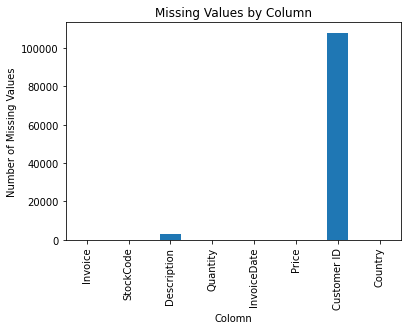

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Colomn')
ax.set_ylabel('Number of Missing Values')
ax.set_title('Missing Values by Column')
df1.isnull().sum().plot(kind='bar')

There are almost 21% missing CustomerID. 
We need to remove them as there is no way we can get the number of CustomerID.



### Handle the Invalid Column

#### Invoice

_According to the data dictionary, if the data in the "invoice_no" column begins with the letter "C", it indicates the transaction has a Cancel status. Canceled transaction data is not suitable for the needs of this analysis, so we need to delete it._

In [ ]:
 df1['Invoice'] = df1['Invoice'].astype('str')

In [ ]:
 df1 = df1[~df1['Invoice'].str.contains('C')]

#### Quantity

Based on "df1.described()" we know that The min and max value for Quantity is 9600 and 19152, this could represent canceled or returned orders.

The following checks whether there is data that has quantity<=0? 

If there is it will be deleted.

In [ ]:
df1 = df1[df1.Quantity > 0]

#### Price

The following checks whether there is data that has unit price<=0? 

If there is it will be deleted.

In [ ]:
df1 = df1[df1.Price > 0]

### Handle Missing Data

Removing the Null values from the data Customer ID.

In [ ]:
df1 = df1[pd.notnull(df1['Customer ID'])]

### Handle Date Column

Transaction data we have from up to 2009-12-01 until 2010-12-09. Since we do not have complete transaction data in December 2011, 

I decided to take out December 2011 data from this analysis, so that we have a full 1 year transaction from December 2009 to November 2010.

In [ ]:
# Handle incomplete data
df1=df1.loc[df1['InvoiceDate']<'2010-12-01']

In [ ]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1['InvoiceDateMonth'] = df1['InvoiceDate'].dt.strftime('%Y-%m')
df1['InvoiceDateDay'] = df1['InvoiceDate'].dt.strftime('%a')
df1['InvoiceDateHour'] = df1['InvoiceDate'].dt.strftime('%H')

In [ ]:
print(df1["InvoiceDate"].min())
print(df1["InvoiceDate"].max())
print("The data is from 1 year transaction")

2009-12-01 07:45:00
2010-11-30 19:35:00
The data is from 1 year transaction


### Handle Duplicated Data

In [ ]:
# Check duplicated Data
df1[df1.duplicated(keep=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDateMonth,InvoiceDateDay,InvoiceDateHour
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2009-12,Tue,11
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2009-12,Tue,11
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2009-12,Tue,11
367,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom,2009-12,Tue,11
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom,2009-12,Tue,11
...,...,...,...,...,...,...,...,...,...,...,...
502420,536251,37448,CERAMIC CAKE DESIGN SPOTTED MUG,1,2010-11-30 14:49:00,1.49,15856.0,United Kingdom,2010-11,Tue,14
502503,536262,22156,HEART DECORATION WITH PEARLS,4,2010-11-30 15:33:00,0.85,14085.0,United Kingdom,2010-11,Tue,15
502505,536262,22156,HEART DECORATION WITH PEARLS,4,2010-11-30 15:33:00,0.85,14085.0,United Kingdom,2010-11,Tue,15
502816,536354,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-11-30 17:43:00,2.95,17820.0,United Kingdom,2010-11,Tue,17


In [ ]:
df1.shape

(393160, 11)

In [ ]:
# Delete duplicated data
df1= df1.drop_duplicates(keep='first')

In [ ]:
df1.shape

(386732, 11)

In [ ]:
df1[df1.duplicated(keep=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDateMonth,InvoiceDateDay,InvoiceDateHour


### Handle Metric Data

In [ ]:
# check general information of the dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386732 entries, 0 to 502937
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           386732 non-null  object        
 1   StockCode         386732 non-null  object        
 2   Description       386732 non-null  object        
 3   Quantity          386732 non-null  int64         
 4   InvoiceDate       386732 non-null  datetime64[ns]
 5   Price             386732 non-null  float64       
 6   Customer ID       386732 non-null  float64       
 7   Country           386732 non-null  object        
 8   InvoiceDateMonth  386732 non-null  object        
 9   InvoiceDateDay    386732 non-null  object        
 10  InvoiceDateHour   386732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 35.4+ MB


In [ ]:
df1.nunique()

Invoice             18437
StockCode            4009
Description          4432
Quantity              337
InvoiceDate         17303
Price                 442
Customer ID          4266
Country                37
InvoiceDateMonth       12
InvoiceDateDay          7
InvoiceDateHour        14
dtype: int64

_From the data we see that the number of Country is only 40, Country column is non- metric data, so we can handle non-metric data in dataset._

In [ ]:
# check unique values - Country
df1['Country'].value_counts()

United Kingdom          351185
EIRE                      8339
Germany                   7407
France                    5184
Netherlands               2726
Spain                     1183
Switzerland               1164
Belgium                   1024
Portugal                   903
Sweden                     867
Channel Islands            804
Italy                      684
Australia                  608
Cyprus                     533
Austria                    524
Greece                     512
Denmark                    398
Finland                    347
United Arab Emirates       315
Unspecified                277
USA                        230
Norway                     218
Poland                     174
Malta                      170
Japan                      147
Lithuania                  119
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
RSA                         65
Brazil                      62
West Ind

In [ ]:
# transform into numerical using pandas get dummies
country_transform_df1 = pd.get_dummies(df1['Country'])
country_transform_df1.head(5)

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Korea,Lithuania,Malta,Netherlands,Nigeria,Norway,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# column_name_country = list(country_transform_df.columns)+'test'
column_name_country = list(country_transform_df1.columns)
column_name_country = ['Country_'+s for s in column_name_country]
country_transform_df1.columns = column_name_country

In [ ]:
print(country_transform_df1.columns)

Index(['Country_Australia', 'Country_Austria', 'Country_Bahrain',
       'Country_Belgium', 'Country_Brazil', 'Country_Canada',
       'Country_Channel Islands', 'Country_Cyprus', 'Country_Denmark',
       'Country_EIRE', 'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy',
       'Country_Japan', 'Country_Korea', 'Country_Lithuania', 'Country_Malta',
       'Country_Netherlands', 'Country_Nigeria', 'Country_Norway',
       'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Singapore', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_Thailand', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified', 'Country_West Indies'],
      dtype='object')


In [ ]:
# join the get_dummies result dataframe with the original dataframe
df1_with_dummies = pd.concat([df1,country_transform_df1],axis=1)

In [ ]:
# check result get_dummies
df1_with_dummies[['Country']+column_name_country].head(5)

,Country,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Denmark,Country_EIRE,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Korea,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Nigeria,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# check combination
df1_with_dummies[['Country']+column_name_country].value_counts()

Country               Country_Australia  Country_Austria  Country_Bahrain  Country_Belgium  Country_Brazil  Country_Canada  Country_Channel Islands  Country_Cyprus  Country_Denmark  Country_EIRE  Country_Finland  Country_France  Country_Germany  Country_Greece  Country_Iceland  Country_Israel  Country_Italy  Country_Japan  Country_Korea  Country_Lithuania  Country_Malta  Country_Netherlands  Country_Nigeria  Country_Norway  Country_Poland  Country_Portugal  Country_RSA  Country_Singapore  Country_Spain  Country_Sweden  Country_Switzerland  Country_Thailand  Country_USA  Country_United Arab Emirates  Country_United Kingdom  Country_Unspecified  Country_West Indies
United Kingdom        0                  0                0                0                0               0               0                        0               0                0             0                0               0                0               0                0               0              0              0  

### Handle Outlier

#### Check Outlier in Dataset

In [ ]:
# assign variable for column in numeric type
numeric_column = ['Quantity','Price','Customer ID']

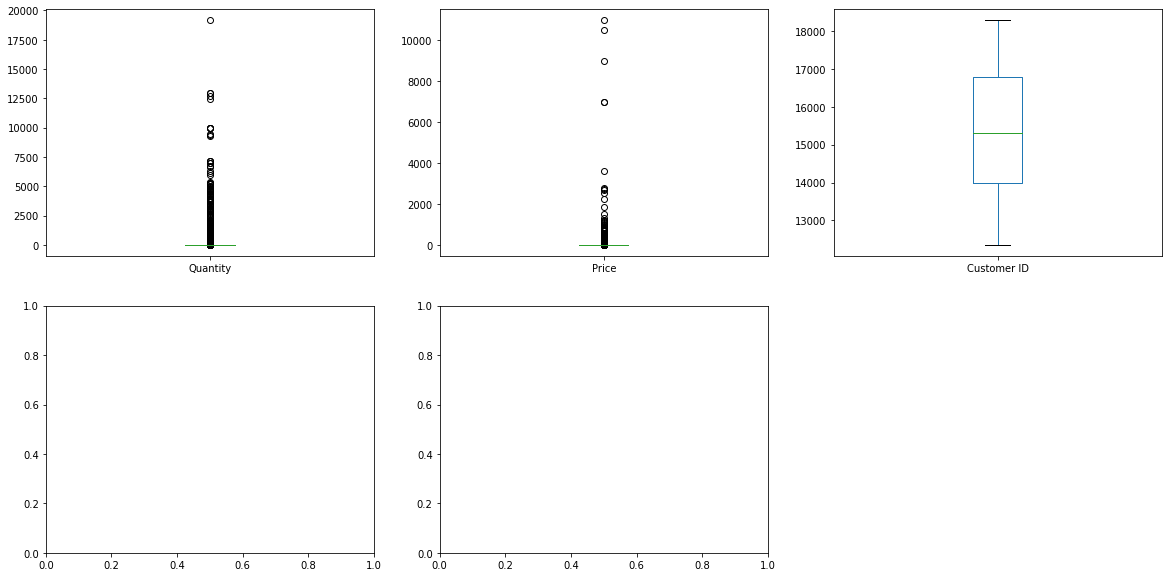

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

for i,el in enumerate(numeric_column):
    a = df1.boxplot(el, ax=axes.flatten()[i],grid=False)

fig.delaxes(axes[1][2])
plt.show()

#### Quantity

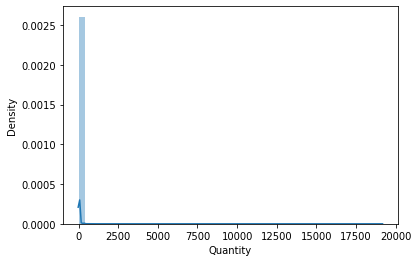

In [ ]:
#checking the outlier
sns.distplot(df1['Quantity'])

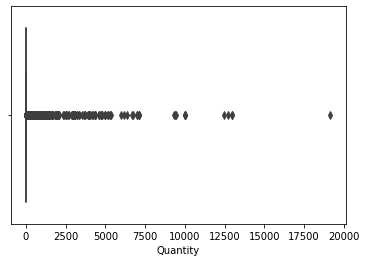

In [ ]:
sns.boxplot(x='Quantity', data=df1)

In [ ]:
df1.shape

(386732, 11)

In [ ]:
# get IQR for Quantity
Q1 = df1['Quantity'].quantile(0.25)
Q3 = df1['Quantity'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 2.0

Q3:
 12.0

IQR:
 10.0

Min:
 -13.0

Max:
 27.0


In [ ]:
df1 = df1[(df1["Quantity"] >= boxplot_min)&(df1["Quantity"] <= boxplot_max)]

In [ ]:
df1.shape

(361229, 11)

#### Price

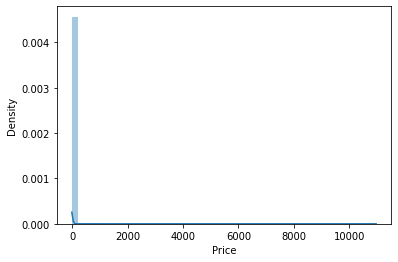

In [ ]:
#checking the outlier
sns.distplot(df1['Price'])

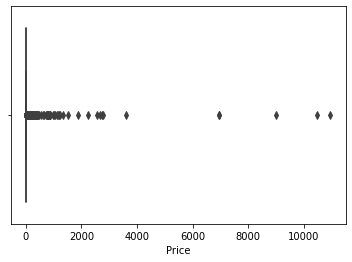

In [ ]:
sns.boxplot(x='Price', data=df1)

In [ ]:
df1.shape

(361229, 11)

In [ ]:
# get IQR for Price
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 1.25

Q3:
 3.75

IQR:
 2.5

Min:
 -2.5

Max:
 7.5


In [ ]:
df1 = df1[(df1["Price"] >= boxplot_min)&(df1["Price"] <= boxplot_max)]

In [ ]:
df1.shape

(330139, 11)

## Exploring the Data

### How many product sold every month?

In [ ]:
#Aggregating the Orders by Month
df1_agg_order= df1.groupby("InvoiceDateMonth").Quantity.sum()
df1_agg_order.head()

InvoiceDateMonth
2009-12    178549
2010-01    134165
2010-02    141136
2010-03    195824
2010-04    167708
Name: Quantity, dtype: int64

In [ ]:
#converting series to dataframe and resetting index.
df1_agg_order=pd.DataFrame(df1_agg_order)
df1_agg_order=df1_agg_order.reset_index()
df1_agg_order.head()

,InvoiceDateMonth,Quantity
0,2009-12,178549
1,2010-01,134165
2,2010-02,141136
3,2010-03,195824
4,2010-04,167708


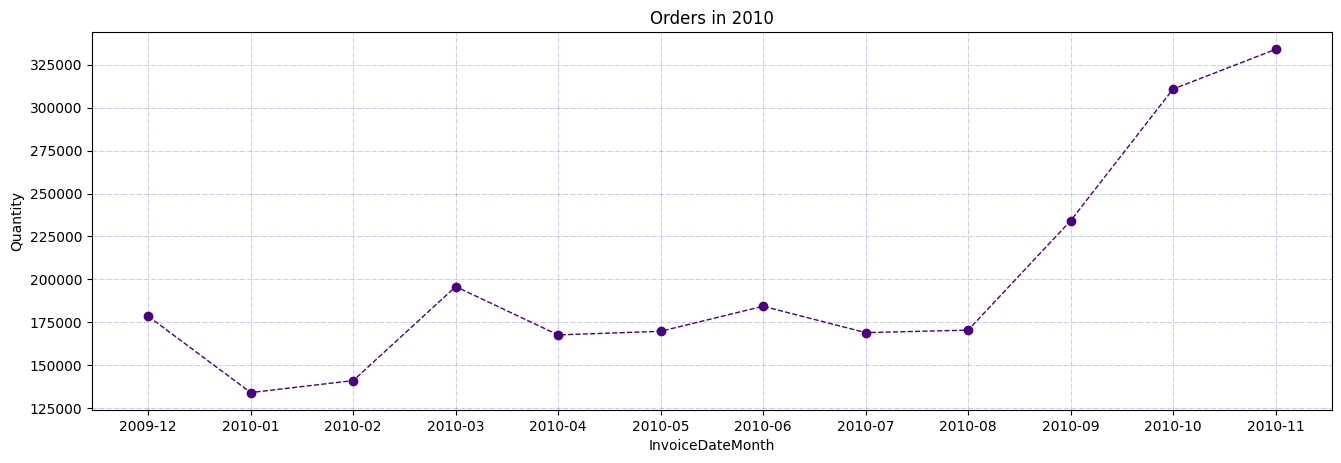

In [ ]:
def plot_df1(df1, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_df1(df1_agg_order, x=df1_agg_order.InvoiceDateMonth, y=df1_agg_order.Quantity,title='Orders in 2010')

***Product sold in November has the highest quantity that has around 13,97% product sold from all transaction along 1 year. Therefore the business team can increase sales in this month such as promoting new products to customers in this month.***

### How much customer spend their money every month?

In [ ]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order
df1['Revenue'] = df1['Quantity']*df1['Price']

In [ ]:
#Monthly Revenue
df1_revenue = df1.groupby(['InvoiceDateMonth'])['Revenue'].sum().reset_index()
df1_revenue

,InvoiceDateMonth,Revenue
0,2009-12,365431.430
1,2010-01,254326.762
2,2010-02,264033.436
3,2010-03,356433.261
4,2010-04,309740.902
5,2010-05,309253.180
6,2010-06,319489.440
7,2010-07,296543.660
8,2010-08,296085.140
9,2010-09,405579.911


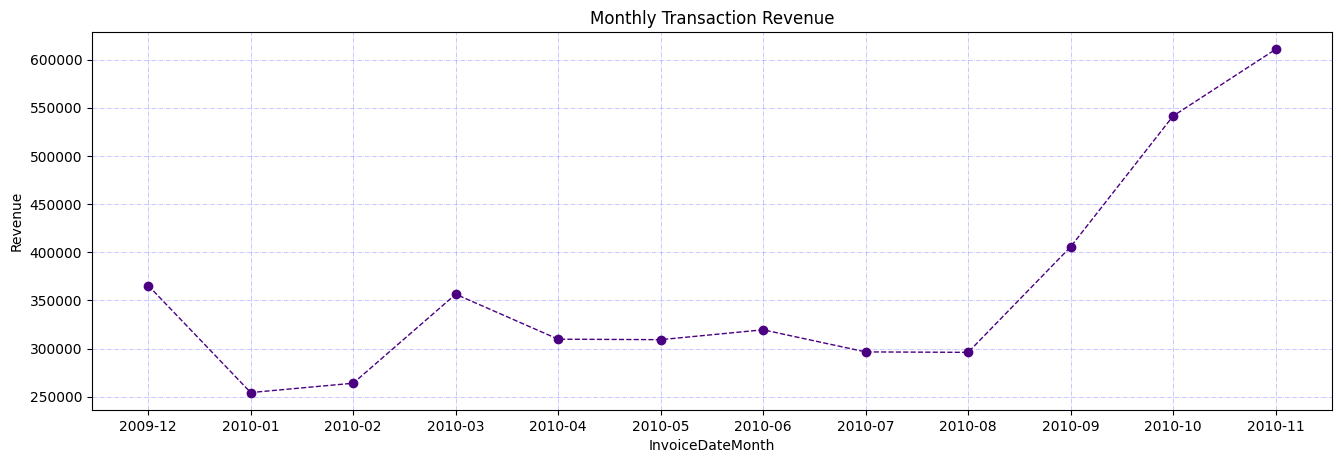

In [ ]:
def plot_df1_revenue(df1, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Revenue', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_df1_revenue(df1_revenue, x=df1_revenue.InvoiceDateMonth, y=df1_revenue.Revenue,title='Monthly Transaction Revenue')

**Revenue in November has the highest amount that has around 14,11% revenue from total revenue along 1 year. Therefore the business team can replicate the success of sales strategies in November to be implemented in other months.**

### How many customers make transactions each month?

In [ ]:
#Aggregating the Customers by Month
df1_Date= df1.groupby("InvoiceDateMonth")
df1_agg_customer=df1_Date['Customer ID'].count()
df1_agg_customer

InvoiceDateMonth
2009-12    26073
2010-01    18546
2010-02    20012
2010-03    27460
2010-04    22593
2010-05    23547
2010-06    25780
2010-07    22685
2010-08    22146
2010-09    29010
2010-10    41666
2010-11    50621
Name: Customer ID, dtype: int64

In [ ]:
#converting series to dataframe and resetting index.
df1_agg_customer=pd.DataFrame(df1_agg_customer)
df1_agg_customer=df1_agg_customer.reset_index()
df1_agg_customer.head()

,InvoiceDateMonth,Customer ID
0,2009-12,26073
1,2010-01,18546
2,2010-02,20012
3,2010-03,27460
4,2010-04,22593


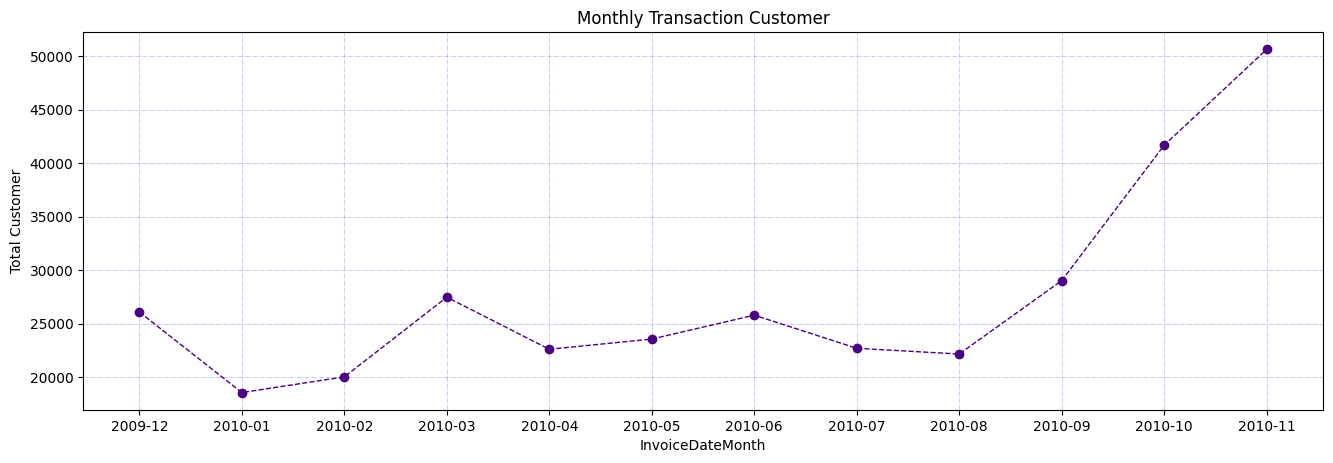

In [ ]:
def plot_df1_customer(df1, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Total Customer', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_df1_customer(df1_agg_customer, x=df1_agg_customer['InvoiceDateMonth'], y=df1_agg_customer['Customer ID'],title='Monthly Transaction Customer')

***The number of customers from December 2009 to November 2010 was fluctuating. However, in general, the number of customers almost every month tends to show an increase, only in January, April, July, and August do the number of customers show a decrease.The business team can provide special discounts in January, April, July, and August to increase the number of customers and sales in this month.***

### How much is the frequency of transactions in months, days, and hours?

#### Month

In [ ]:
#Frequency Transaction by Month
df1_Date_Month= df1.groupby("InvoiceDateMonth")
df1_month_invoice=df1_Date_Month['Invoice'].count()
df1_month_invoice.head()

InvoiceDateMonth
2009-12    26073
2010-01    18546
2010-02    20012
2010-03    27460
2010-04    22593
Name: Invoice, dtype: int64

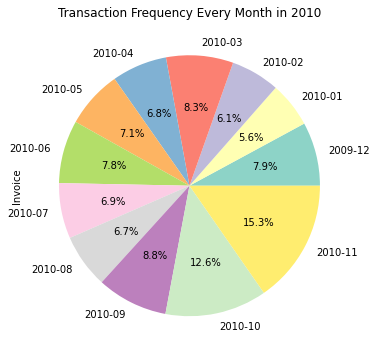

In [ ]:
df1_month_invoice=df1_Date_Month['Invoice'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Month in 2010')
plt.show()

***The number of customers in November is the highest number of customers that has around 15,3% of the total customers along 1 year. The business team can increase sales by promoting new products to customers in November.***

#### Day

In [ ]:
# Frequency Transaction by Day
df1_Date_Day= df1.groupby("InvoiceDateDay")
df1_day_invoice=df1_Date_Day['Invoice'].count()
df1_day_invoice

InvoiceDateDay
Fri    41107
Mon    51865
Sat      338
Sun    60967
Thu    65365
Tue    57640
Wed    52857
Name: Invoice, dtype: int64

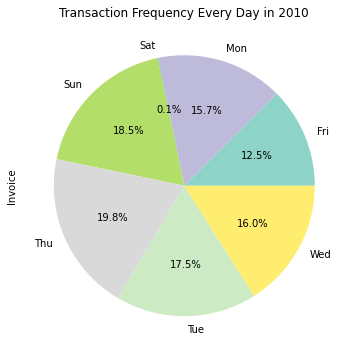

In [ ]:
df1_day_invoice=df1_Date_Day['Invoice'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Day in 2010')
plt.show()

***Most consumers make transactions on Thursday, which is around 19,8% of the total daily transactions. Business teams can increase sales by promoting new products to customers on Thursday.***

#### Hour

In [ ]:
# Frequency Transaction by Hour
df1_Date_Hour= df1.groupby("InvoiceDateHour")
df1_hour_invoice=df1_Date_Hour['Invoice'].count()
df1_hour_invoice.head()

InvoiceDateHour
07      442
08     5047
09    15379
10    27734
11    41465
Name: Invoice, dtype: int64

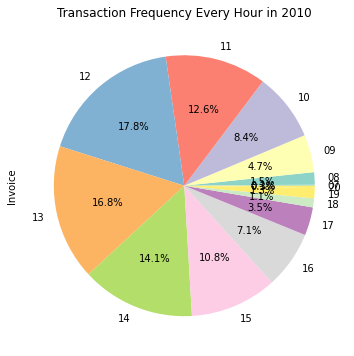

In [ ]:
df1_hour_invoice=df1_Date_Hour['Invoice'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Hour in 2010')
plt.show()

***Most consumers order the products at 12 AM with a transaction amount of 17.8% of the total daily transactions. Business teams can increase sales by promoting new products to customers at 12 AM.***

### What products are the most popular?

In [ ]:
df1["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
STRAWBERRY CERAMIC TRINKET BOX        1181
HOME BUILDING BLOCK WORD              1154
REX CASH+CARRY JUMBO SHOPPER          1052
ASSORTED COLOUR BIRD ORNAMENT         1028
Name: Description, dtype: int64

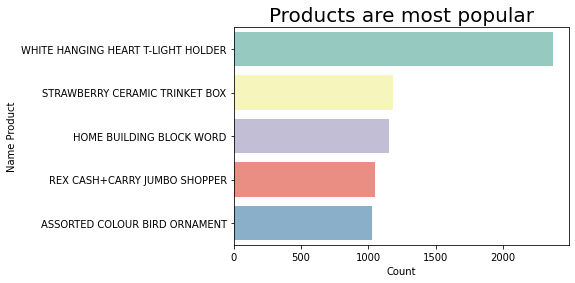

In [ ]:
x = df1["Description"].value_counts().head()
sns.barplot(x = x.values, y = x.index, palette='Set3')
plt.title('Products are most popular', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Name Product');

***White Hanging Heart T-Light Holder became the product that was most in-demand by consumers in 2010. The number of purchases of White Hanging Heart T-Light Holder reached 2369 units in 2010.The business team can provide special discounts from this product to attract more users.*** 

### Most consumers by country?

In [ ]:
df1['Country'].value_counts().head(5)

United Kingdom    302776
EIRE                6342
Germany             6122
France              4236
Netherlands         1288
Name: Country, dtype: int64

In [ ]:
df1['Country'].count()

330139

In [ ]:
302776/330139

0.917116729619948

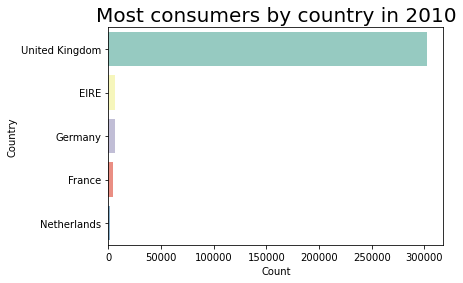

In [ ]:
x = df1['Country'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index, palette='Set3')
plt.title('Most consumers by country in 2010', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Country');

***The United Kingdom became the city with the highest number of customers in 2010. The total number of customers in United Kingdom reached 302776 (91.71%) customers in 2010. The business team can focus on promotions in the United Kingdom to increase sales.***

## RFM Analysis

**Recency, Frequency, Monetary Value (RFM) analysis method** is a method of customer analysis and segmentation based on customer habits. The variables used to perform RFM analysis are:

- Recency: How recently the customer made a transaction.
- Frequency: How often customers make transactions
- Monetary: How many transactions the customer has made

**In this case**, the dataset contains transaction data from 01/12/2009 to 01/12/2010, so the RFM Value is treated as follows:
- Recency: The difference between the last day the customer made a transaction and the day he did the analysis. In this case, the day of analysis uses the data of the last day of the transaction.
- Frequency: The number of transactions made by customers from 01/12/2009 to 01/12/2010.
- Monetary: Total order amount issued by customers from 01/12/2009 to 01/12/2010.

Here are the steps in creating an RFM model:

1. Calculate RFM Value
2. Calculate RFM Score
3. Calculate the total RFM score
4. Labeling

### 1. RFM Value

#### Recency

To find out the value recency, we must know the number of days the customer has been inactive (not making a purchase) since the last purchase.

In [ ]:
# create Dataframe rfm_table 
rfm_table1 = pd.DataFrame(df1['Customer ID'].unique())
rfm_table1.columns = ['Customer ID']
rfm_table1.head()

,Customer ID
0,13085.0
1,13078.0
2,15362.0
3,12682.0
4,18087.0


In [ ]:
# the latest purchase for every customer
latest_purchase = df1.groupby('Customer ID').InvoiceDate.max().reset_index()
latest_purchase.columns = ['Customer ID','LatestPurchaseDate']
latest_purchase.head()

,Customer ID,LatestPurchaseDate
0,12346.0,2010-06-28 13:53:00
1,12347.0,2010-10-31 14:20:00
2,12348.0,2010-09-27 14:59:00
3,12349.0,2010-10-28 08:23:00
4,12351.0,2010-11-29 15:23:00


In [ ]:
# Calculate Recency
# Recency = point in time of observation - number of days last purchase
latest_purchase['Recency'] = (latest_purchase['LatestPurchaseDate'].max() - latest_purchase['LatestPurchaseDate']).dt.days
latest_purchase.head()

,Customer ID,LatestPurchaseDate,Recency
0,12346.0,2010-06-28 13:53:00,155
1,12347.0,2010-10-31 14:20:00,30
2,12348.0,2010-09-27 14:59:00,64
3,12349.0,2010-10-28 08:23:00,33
4,12351.0,2010-11-29 15:23:00,1


In [ ]:
rfm_table1 = pd.merge(rfm_table1, latest_purchase[['Customer ID','Recency']], on='Customer ID')
rfm_table1.head()

,Customer ID,Recency
0,13085.0,305
1,13078.0,0
2,15362.0,74
3,12682.0,11
4,18087.0,5


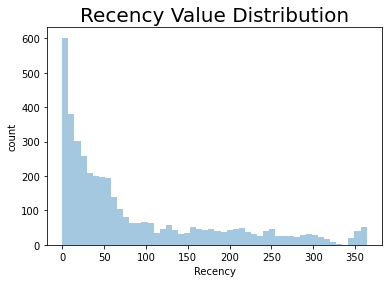

In [ ]:
# Recency value distribution
sns.distplot(rfm_table1['Recency'], kde=False, bins=50)
plt.title('Recency Value Distribution', fontsize = 20)
plt.xlabel('Recency')
plt.ylabel('count');

#### Frequency

In [ ]:
# Calculate Frequency
frequency = df1.groupby('Customer ID').InvoiceDate.count().reset_index()
frequency.columns = ['Customer ID','frequency']
frequency.head()

,Customer ID,frequency
0,12346.0,33
1,12347.0,39
2,12348.0,20
3,12349.0,80
4,12351.0,20


In [ ]:
rfm_table1 = pd.merge(rfm_table1,frequency, on='Customer ID')
rfm_table1

,Customer ID,Recency,frequency
0,13085.0,305,61
1,13078.0,0,347
2,15362.0,74,31
3,12682.0,11,400
4,18087.0,5,50
...,...,...,...
4091,17826.0,0,32
4092,15769.0,0,1
4093,16473.0,0,10
4094,17820.0,0,35


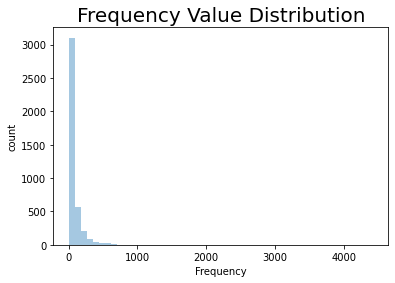

In [ ]:
# Frequency Value Distribution
sns.distplot(rfm_table1['frequency'], kde=False, bins=50)
plt.title('Frequency Value Distribution', fontsize = 20)
plt.xlabel('Frequency')
plt.ylabel('count');

#### Monetary

In [ ]:
# Calculate Monetary
monetary = df1.groupby('Customer ID').Revenue.sum().reset_index()
monetary.columns = ['Customer ID','monetary']
monetary.head()

,Customer ID,monetary
0,12346.0,372.86
1,12347.0,573.28
2,12348.0,222.16
3,12349.0,1635.89
4,12351.0,288.18


In [ ]:
rfm_table1 = pd.merge(rfm_table1, monetary, on='Customer ID')
rfm_table1.head()

,Customer ID,Recency,frequency,monetary
0,13085.0,305,61,1916.40
1,13078.0,0,347,11466.64
2,15362.0,74,31,444.81
3,12682.0,11,400,7977.27
4,18087.0,5,50,1675.26


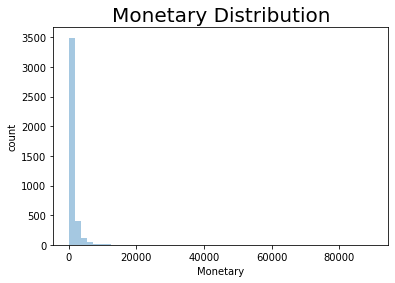

In [ ]:
# Monetary Value Distribution
sns.distplot(rfm_table1['monetary'], kde=False, bins=50)
plt.title('Monetary Distribution', fontsize = 20)
plt.xlabel('Monetary')
plt.ylabel('count');

### 2. RFM Score

The calculation of the individual RFM Score can be done using the Quartile statistical method (dividing the Score into four parts).

The steps is:

1. Split the metrics into segments using quantiles.
2. We assign a score from 1 to 4 to Recency, Frequency and Monetary.
3. Four is the best/highest value, and one is the lowest/worst value.

In [ ]:
quartiles = rfm_table1.quantile(q=[0.25, 0.5, 0.75])
quartiles

,Customer ID,Recency,frequency,monetary
0.25,13897.75,15.0,16.0,219.9525
0.50,15365.50,47.0,38.0,489.5500
0.75,16840.25,135.0,87.0,1183.5400


In [ ]:
segmented_rfm1 = rfm_table1.copy()

In [ ]:
def recency_score (data):
    if data <= 15:
        return 4
    elif data <= 47:
        return 3
    elif data <= 135:
        return 2
    else:
        return 1

def frequency_score (data):
    if data <= 16:
        return 1
    elif data <= 38:
        return 2
    elif data <= 87:
        return 3
    else:
        return 4
def monetary_value_score (data):
    if data <= 219.9525:
        return 1
    elif data <= 489.5500:
        return 2
    elif data <= 1183.5400:
        return 3
    else:
        return 4

segmented_rfm1['R'] = segmented_rfm1['Recency'].apply(recency_score )
segmented_rfm1['F'] = segmented_rfm1['frequency'].apply(frequency_score)
segmented_rfm1['M'] = segmented_rfm1['monetary'].apply(monetary_value_score)
segmented_rfm1.head()

,Customer ID,Recency,frequency,monetary,R,F,M
0,13085.0,305,61,1916.40,1,3,4
1,13078.0,0,347,11466.64,4,4,4
2,15362.0,74,31,444.81,2,2,2
3,12682.0,11,400,7977.27,4,4,4
4,18087.0,5,50,1675.26,4,3,4


- Best Recency score = 4: purchased very recently. 
- Best Frequency score = 4: highest quantity purchases. 
- Best Monetary score = 4: spent the most.



### 3. Total RFM Score

A total RFM score is calculated simply by combining individual RFM score numbers.

In [ ]:
segmented_rfm1['RFM_score'] =segmented_rfm1[['R', 'F', 'M']].sum(axis=1)
segmented_rfm1.head()

,Customer ID,Recency,frequency,monetary,R,F,M,RFM_score
0,13085.0,305,61,1916.40,1,3,4,8
1,13078.0,0,347,11466.64,4,4,4,12
2,15362.0,74,31,444.81,2,2,2,6
3,12682.0,11,400,7977.27,4,4,4,12
4,18087.0,5,50,1675.26,4,3,4,11


In [ ]:
segmented_rfm1['RFM_Segment'] = segmented_rfm1.R.map(str)+segmented_rfm1.F.map(str)+segmented_rfm1.M.map(str)
segmented_rfm1.head()

,Customer ID,Recency,frequency,monetary,R,F,M,RFM_score,RFM_Segment
0,13085.0,305,61,1916.40,1,3,4,8,134
1,13078.0,0,347,11466.64,4,4,4,12,444
2,15362.0,74,31,444.81,2,2,2,6,222
3,12682.0,11,400,7977.27,4,4,4,12,444
4,18087.0,5,50,1675.26,4,3,4,11,434


### 4. Labelling

In [ ]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm1)

for i in range(0,len(segmented_rfm1)):

    if segmented_rfm1['RFM_Segment'][i] == '444':
        label[i] = "Best Customers"
        
    elif segmented_rfm1['RFM_Segment'][i] == '334'or segmented_rfm1['RFM_Segment'][i] == '441'or segmented_rfm1['RFM_Segment'][i] == '442'or segmented_rfm1['RFM_Segment'][i] == '244'or segmented_rfm1['RFM_Segment'][i] == '343'or segmented_rfm1['RFM_Segment'][i] == '344'or segmented_rfm1['RFM_Segment'][i] == '433'or segmented_rfm1['RFM_Segment'][i] == '434'or segmented_rfm1['RFM_Segment'][i] == '443':
        label[i] = "Loyal Custumers"
        
    elif segmented_rfm1['RFM_Segment'][i] == '311'or segmented_rfm1['RFM_Segment'][i] == '324'or segmented_rfm1['RFM_Segment'][i] == '341'or segmented_rfm1['RFM_Segment'][i] == '342'or segmented_rfm1['RFM_Segment'][i] == '314'or segmented_rfm1['RFM_Segment'][i] == '414'or segmented_rfm1['RFM_Segment'][i] == '424'or segmented_rfm1['RFM_Segment'][i] == '312' or segmented_rfm1['RFM_Segment'][i] == '313' or segmented_rfm1['RFM_Segment'][i] == '321'or segmented_rfm1['RFM_Segment'][i] == '322'or segmented_rfm1['RFM_Segment'][i] == '323'or segmented_rfm1['RFM_Segment'][i] == '331'or segmented_rfm1['RFM_Segment'][i] == '332'or segmented_rfm1['RFM_Segment'][i] == '333'or segmented_rfm1['RFM_Segment'][i] == '411'or segmented_rfm1['RFM_Segment'][i] == '412'or segmented_rfm1['RFM_Segment'][i] == '413'or segmented_rfm1['RFM_Segment'][i] == '421'or segmented_rfm1['RFM_Segment'][i] == '422'or segmented_rfm1['RFM_Segment'][i] == '423'or segmented_rfm1['RFM_Segment'][i] == '431'or segmented_rfm1['RFM_Segment'][i] == '432':
        label[i] = "Potential Costumers"

    elif segmented_rfm1['RFM_Segment'][i] == '222'or segmented_rfm1['RFM_Segment'][i] == '223'or segmented_rfm1['RFM_Segment'][i] == '232'or segmented_rfm1['RFM_Segment'][i] == '233'or segmented_rfm1['RFM_Segment'][i] == '113'or segmented_rfm1['RFM_Segment'][i] == '114'or segmented_rfm1['RFM_Segment'][i] == '131'or segmented_rfm1['RFM_Segment'][i] == '141'or segmented_rfm1['RFM_Segment'][i] == '213'or segmented_rfm1['RFM_Segment'][i] == '214'or segmented_rfm1['RFM_Segment'][i] == '231'or segmented_rfm1['RFM_Segment'][i] == '214'or segmented_rfm1['RFM_Segment'][i] == '231'or segmented_rfm1['RFM_Segment'][i] == '241'or segmented_rfm1['RFM_Segment'][i] == '243':
        label[i] = "Customers Needing Attention"
    
    elif segmented_rfm1['RFM_Segment'][i] == '144'or segmented_rfm1['RFM_Segment'][i] == '244'or segmented_rfm1['RFM_Segment'][i] == '143'or segmented_rfm1['RFM_Segment'][i] == '134':
        label[i] = "Cant' Lose Them"

    elif segmented_rfm1['RFM_Segment'][i] == '121'or segmented_rfm1['RFM_Segment'][i] == '122'or segmented_rfm1['RFM_Segment'][i] == '112'or segmented_rfm1['RFM_Segment'][i] == '212'or segmented_rfm1['RFM_Segment'][i] == '211'or segmented_rfm1['RFM_Segment'][i] == '221'or segmented_rfm1['RFM_Segment'][i] == '222'or segmented_rfm1['RFM_Segment'][i] == '123'or segmented_rfm1['RFM_Segment'][i] == '124'or segmented_rfm1['RFM_Segment'][i] == '132'or segmented_rfm1['RFM_Segment'][i] == '133'or segmented_rfm1['RFM_Segment'][i] == '134'or segmented_rfm1['RFM_Segment'][i] == '142'or segmented_rfm1['RFM_Segment'][i] == '224'or segmented_rfm1['RFM_Segment'][i] == '242':
        label[i] = "At Risk Customers"

    elif segmented_rfm1['RFM_Segment'][i] == '111':
        label[i] = "Lost Customers"
        
    else:
        label[i] = "Others"

In [ ]:
segmented_rfm1['label'] = label
segmented_rfm1

,Customer ID,Recency,frequency,monetary,R,F,M,RFM_score,RFM_Segment,label
0,13085.0,305,61,1916.40,1,3,4,8,134,Cant' Lose Them
1,13078.0,0,347,11466.64,4,4,4,12,444,Best Customers
2,15362.0,74,31,444.81,2,2,2,6,222,Customers Needing Attention
3,12682.0,11,400,7977.27,4,4,4,12,444,Best Customers
4,18087.0,5,50,1675.26,4,3,4,11,434,Loyal Custumers
...,...,...,...,...,...,...,...,...,...,...
4091,17826.0,0,32,125.39,4,2,1,7,421,Potential Costumers
4092,15769.0,0,1,30.60,4,1,1,6,411,Potential Costumers
4093,16473.0,0,10,154.72,4,1,1,6,411,Potential Costumers
4094,17820.0,0,35,106.24,4,2,1,7,421,Potential Costumers


In [ ]:
# Count the frequency that a value occurs in a dataframe column for the labels.
segmented_rfm1['label'].value_counts()

Potential Costumers            1013
At Risk Customers               873
Loyal Custumers                 782
Customers Needing Attention     548
Best Customers                  381
Lost Customers                  359
Cant' Lose Them                  72
Others                           68
Name: label, dtype: int64

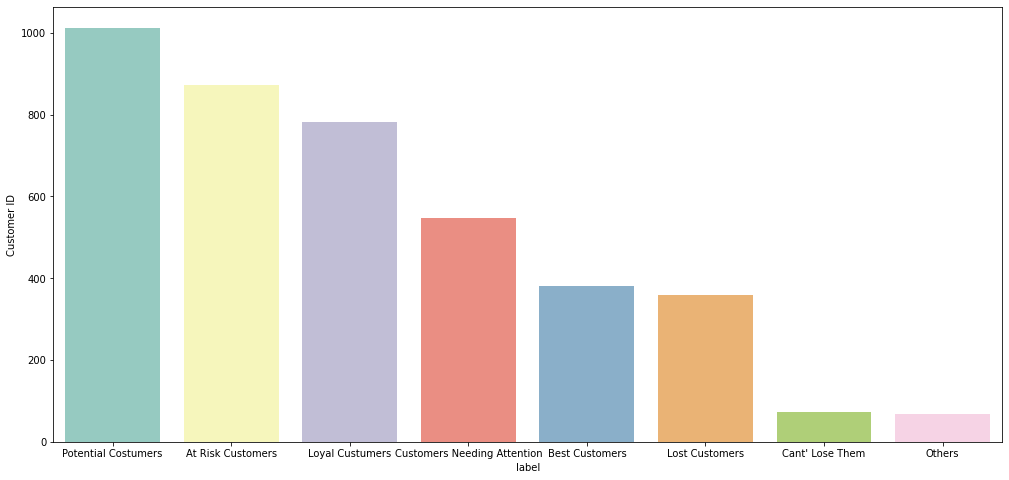

In [ ]:
segmentation1=segmented_rfm1.groupby('label')['Customer ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,8))
segmentation1.drop([0],inplace=False)
sns.barplot(data=segmentation1, x="label", y="Customer ID", palette = "Set3");

## K-Means Clustering

We have segmented customers based on RFM values to make a different and optimal approach with **the Quantile Method**. However, this RFM segmentation process can also be done by scoring or the original value using **Machine Learning techniques.**

Machine learning methods can be used for segmentation and are familiarly known as Unsupervised Machine Learning. **The Unsupervised Machine Learning** approach will study data patterns and then group each data into unique clusters. 

**K-Means clustering algorithm** is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [ ]:
# create Dataframe new_rfm1 
new_rfm1 = rfm_table1.drop('Customer ID', axis=1)
new_rfm1.head()

,Recency,frequency,monetary
0,305,61,1916.40
1,0,347,11466.64
2,74,31,444.81
3,11,400,7977.27
4,5,50,1675.26


### **K-means gives the best result under the following conditions:**

1. Data’s distribution is not skewed.
2. Data is standardised (i.e. mean of 0 and standard deviation of 1).

In [ ]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.2748293955151948, : SkewtestResult(statistic=26.274419254652884, pvalue=3.760492909116152e-152)
frequency's: Skew: 12.685114700993669, : SkewtestResult(statistic=73.60669749748544, pvalue=0.0)
monetary's: Skew: 18.113792323034662, : SkewtestResult(statistic=81.22998529463459, pvalue=0.0)


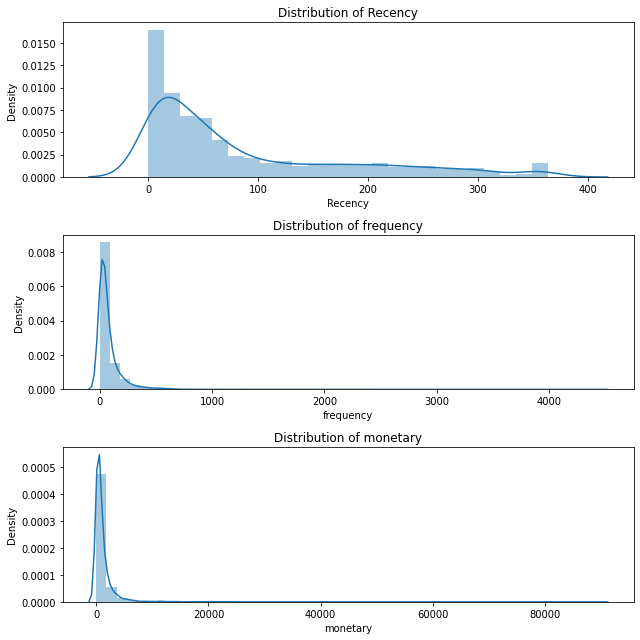

In [ ]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(new_rfm1,'Recency')

plt.subplot(3, 1, 2)
check_skew(new_rfm1,'frequency')

plt.subplot(3, 1, 3)
check_skew(new_rfm1,'monetary')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable.I add a small constant as log transformation demands all the values to be positive.

In [ ]:
df_rfm_log = new_rfm1.copy()

Recency's: Skew: -0.5512910652249013, : SkewtestResult(statistic=-13.516275739603657, pvalue=1.253634775065823e-41)
frequency's: Skew: 0.0008409440538804451, : SkewtestResult(statistic=0.022012146382740686, pvalue=0.9824382664737509)
monetary's: Skew: -0.08855080389349748, : SkewtestResult(statistic=-2.313368316590396, pvalue=0.02070239751779811)


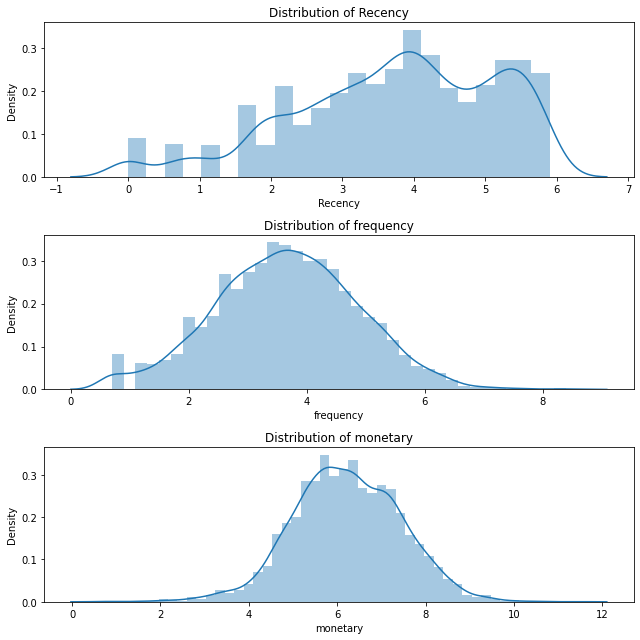

In [ ]:
df_rfm_log = np.log(df_rfm_log+1)
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'monetary')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [ ]:
new_rfm1.describe()

,Recency,frequency,monetary
count,4096.000000,4096.000000,4096.000000
mean,87.174805,80.600342,1056.892762
std,95.081551,169.459371,2314.858825
min,0.000000,1.000000,0.950000
25%,15.000000,16.000000,219.952500
50%,47.000000,38.000000,489.550000
75%,135.000000,87.000000,1183.540000
max,364.000000,4425.000000,89915.720000


In [ ]:
scaler = StandardScaler()
scaler.fit(df_rfm_log)
RFM_scaled1 = scaler.transform(df_rfm_log)

In [ ]:
RFM_scaled1 = pd.DataFrame(RFM_scaled1, columns=df_rfm_log.columns)
RFM_scaled1

,Recency,frequency,monetary
0,1.409369,0.387551,1.098957
1,-2.648314,1.810231,2.563190
2,0.412530,-0.157910,-0.095341
3,-0.886662,1.927141,2.266172
4,-1.378063,0.226479,0.988924
...,...,...,...
4091,-2.648314,-0.132532,-1.127287
4092,-2.648314,-2.444489,-2.262135
4093,-2.648314,-1.038568,-0.956442
4094,-2.648314,-0.060773,-1.261796


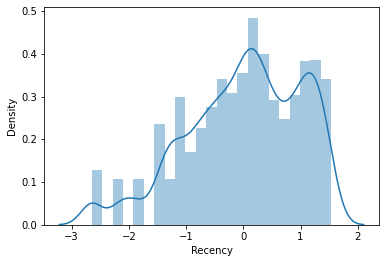

In [ ]:
#Analyze distribution
sns.distplot(RFM_scaled1['Recency'])

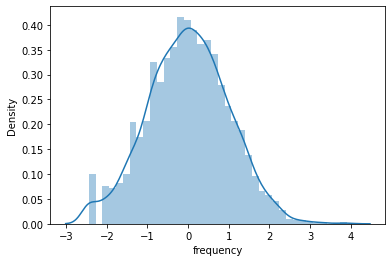

In [ ]:
sns.distplot(RFM_scaled1['frequency'])

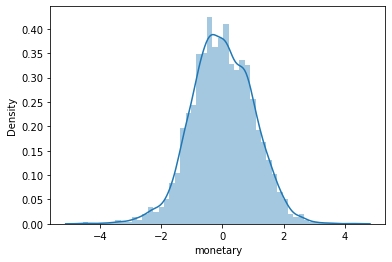

In [ ]:
sns.distplot(RFM_scaled1['monetary'])

### Finding the optimal number of clusters

In [ ]:
X = np.asarray(RFM_scaled1)

In [ ]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_scaled1) 
    kmeanModel.fit(RFM_scaled1)     
      
    distortions.append(sum(np.min(cdist(RFM_scaled1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_scaled1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_scaled1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_scaled1.shape[0] 
    mapping2[k] = kmeanModel.inertia_

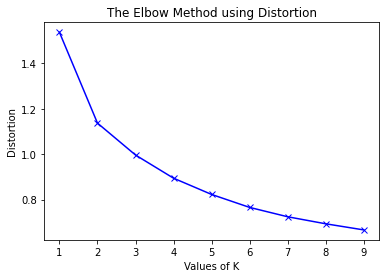

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

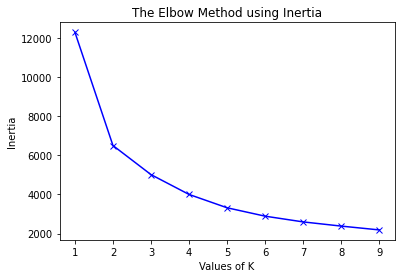

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

The cluster value where this decrease in distortion and inertia value becomes constant can be chosen as the right cluster value for our data. Looking at the above elbow curve, we can choose any number of clusters between 3 to 5.

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
    # Extract cluster labels
    cluster_labels = kmeans.labels_
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    return df_new

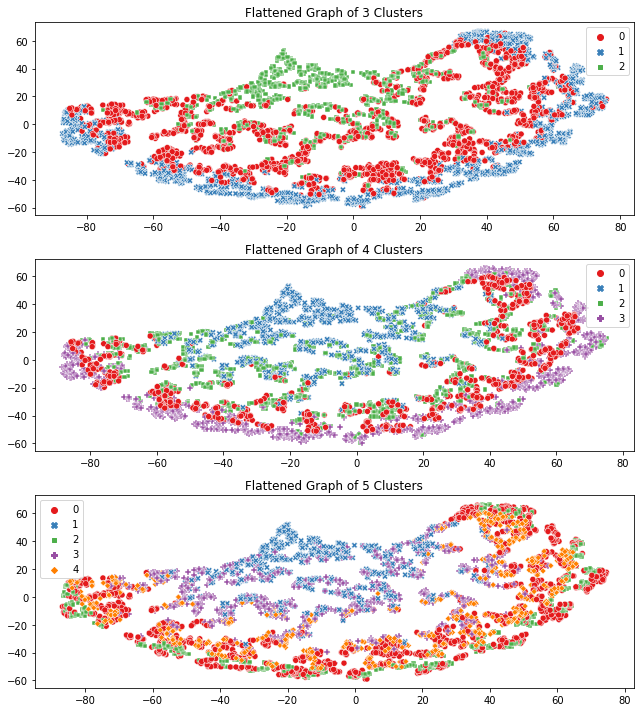

In [ ]:
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_scaled1, 3, rfm_table1)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_scaled1, 4, rfm_table1)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_scaled1, 5, rfm_table1)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=rfm_table1.index, 
                                       columns=rfm_table1.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['Customer ID', 'Cluster'],
                        value_vars=['Recency', 'frequency', 'monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

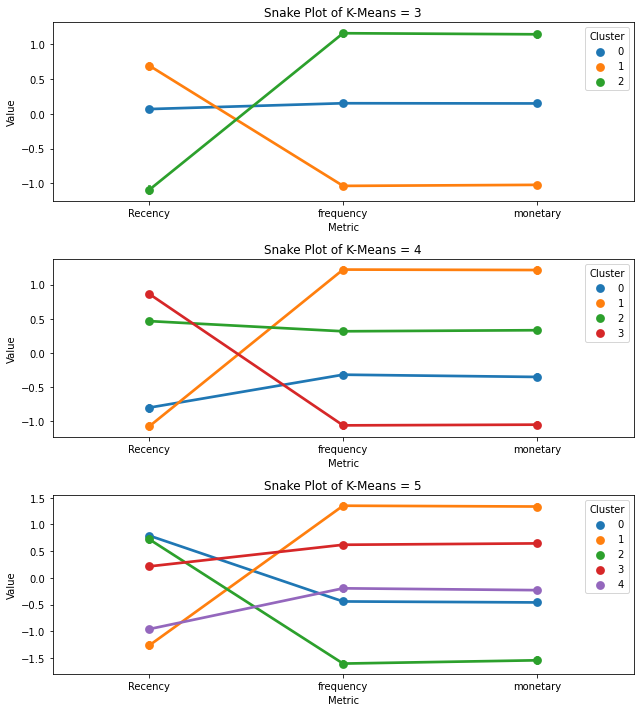

In [ ]:
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_scaled1, df_rfm_k3, rfm_table1)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_scaled1, df_rfm_k4, rfm_table1)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_scaled1, df_rfm_k5, rfm_table1)

plt.tight_layout()

From the flattened graphs and the snake plots it is evident that having a cluster value of 4,segments our customers well. We could also go for higher number of clusters, it completely depends on how the company wants to segment their customers.

### Evaluating Model

#### Davies Bouldin Score

Davies Bouldin Score is a metric for evaluating clustering algorithms.

The **smaller** Davies Bouldin Score is The more optimal the cluster.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

1.1008055700024542


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

0.9905030265761872


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

0.9955403825463638


In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

0.9759474238606126


K-Means with 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

#### Silhouetter Score

Silhoutter Score is a metric for evaluating clustering algorithms. 

The **higher** Silhouuter Score is the more optimal the cluster.

In [ ]:
km = KMeans(n_clusters=3)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.302


In [ ]:
km = KMeans(n_clusters=4)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.4f' % score)

Silhouetter Score: 0.3143


In [ ]:
km = KMeans(n_clusters=5)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.5f' % score)

Silhouetter Score: 0.30206


In [ ]:
km = KMeans(n_clusters=6)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.6f' % score)

Silhouetter Score: 0.305213


K-Means with 4 clusters has higher Silhoutter score than other cluster. Therefore the optimum cluster is 4.

### Interpretation of the clusters formed using K-Means

Based on Elbow Method, Davies Bouldin Score, and Silhoutter Score the optimum cluster is 4.

In [ ]:
df_rfm_k4.head()

,Customer ID,Recency,frequency,monetary,Cluster
0,13085.0,305,61,1916.40,2
1,13078.0,0,347,11466.64,1
2,15362.0,74,31,444.81,2
3,12682.0,11,400,7977.27,1
4,18087.0,5,50,1675.26,1


In [ ]:
df_rfm_k4.Cluster.value_counts()

2    1267
3    1153
1     882
0     794
Name: Cluster, dtype: int64

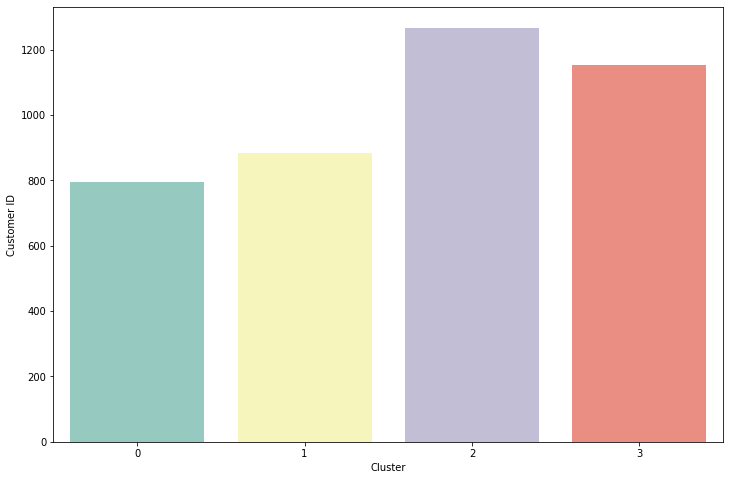

In [ ]:
sq1=df_rfm_k4.groupby('Cluster')['Customer ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="Customer ID", palette = "Set3");

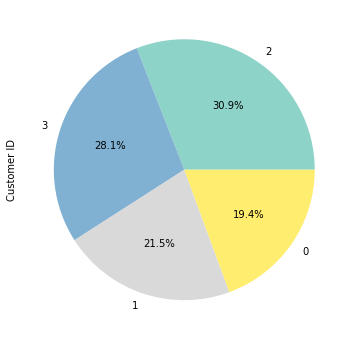

In [ ]:
df_rfm_k4.groupby('Cluster')['Customer ID'].nunique().sort_values(ascending=False).plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.show()

- "Cluster 0" has 19.4% customers.
- "Cluster 1" has 21.5% customers. 
- "Cluster 2" has 28.1% customers. 
- "Cluster 3" has 30.9% customers. 

In [ ]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean']
    }).round(0)
    return df_new

In [ ]:
rfm_values(df_rfm_k4).reset_index()

,Cluster,Recency,frequency,monetary
,,mean,mean,mean
0,0,17.0,31.0,387.0
1,1,14.0,233.0,3048.0
2,2,101.0,67.0,894.0
3,3,176.0,13.0,174.0


In [ ]:
# Cluster 0
Cluster0=recency_score(17),frequency_score(31),monetary_value_score(387)
print(Cluster0,
      'Potential Customers')

(3, 2, 2) Potential Customers


In [ ]:
#Cluster 1 
Cluster1=recency_score(14),frequency_score(233),monetary_value_score(3048)
print(Cluster1,
      'Best Customer')

(4, 4, 4) Best Customer


In [ ]:
#Cluster 2 
Cluster2=recency_score(101),frequency_score(67),monetary_value_score(894)
print(Cluster2,
      'Customers Needing Attention')

(2, 3, 3) Customers Needing Attention


In [ ]:
# Cluster 3 
Cluster3=recency_score(176),frequency_score(13),monetary_value_score(174)
print(Cluster3,
      'Lost Customers')

(1, 1, 1) Lost Customers


- Cluster 0 => **Potential Loyalist** => Recent customers, but spent a good amount and bought more than once.

- Cluster 1 => **Best Customer** => Bought recently, buy often and spend the most.

- Cluster 2 => **Customer Need Attention** => Above average recency, frequency and monetary values. May not have bought very recently though.

- Cluster 3 => **Lost Customer** => Last purchase was long back, low spenders and low number of orders.

## Recommendation


Based on the 4 clusters, we could formulate **marketing strategies** relevant to each cluster: 
1.	Cluster 0 => **Potential Loyalist** => Offer membership / loyalty program and recommend other products.
2.	Cluster 1 => **Best Customer** => Reward them, can be early adopters for new products. Will promote your brand, and ask for reviews. 
3.	Cluster 2 => **Customer Need Attention** => Make limited time offers, recommend based on past purchases, share valuable resources, recommend popular products / renewals at discount, and reconnect with them.
4.	Cluster 3 => **Lost Customer** => Revive interest with reach out campaign, ignore otherwise, offer other relevant products and special discounts, and recreate brand value.


# Online Retail in 2010 - 2011 

In [ ]:
## see the online retail in Second Year
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Cleansing the Data

### Simple Data Checking

In [ ]:
# Get row and column of dataframe
print(df2.shape)

(541910, 8)


In [ ]:
# Get columns name
print(df2.columns)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [ ]:
# Display the first rows
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Display the last rows
df2.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
# Display random rows
df2.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
478050,577078,23534,WALL ART STOP FOR TEA,2,2011-11-17 15:17:00,12.46,NaN,United Kingdom
137152,548033,21181,PLEASE ONE PERSON METAL SIGN,12,2011-03-29 12:01:00,2.10,14441.0,United Kingdom
492190,578094,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-11-22 17:23:00,0.95,16261.0,United Kingdom
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE
216907,555857,22536,MAGIC DRAWING SLATE PURDEY,2,2011-06-07 14:03:00,0.42,16393.0,United Kingdom


In [ ]:
# check general information of the dataset 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df2.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- The min and max value for Quantity is 80995, this could represent canceled or returned orders.
- The UnitPrice also has few negative values which are uncommon, these transactions could represent cancelled orders by customers or bad debt incurred by the business.
- Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.

We need to clean the above values by removing them from the dataset

In [ ]:
# check standard missing value - multiple column
df2[df2.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
df2.isnull().any(axis=0)

Invoice        False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
Price          False
Customer ID     True
Country        False
dtype: bool

In [ ]:
df2.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
541905    False
541906    False
541907    False
541908    False
541909    False
Length: 541910, dtype: bool

In [ ]:
# Check Missing Values by Column
# Check missing values in each feature
df2.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

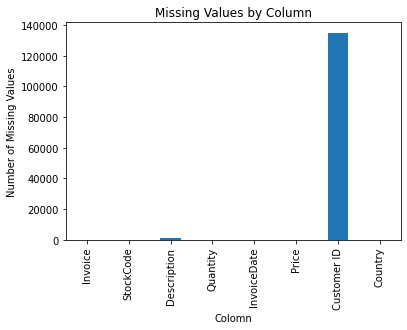

In [ ]:
fig, ax = plt.subplots()

ax.set_xlabel('Colomn')
ax.set_ylabel('Number of Missing Values')
ax.set_title('Missing Values by Column')


df2.isnull().sum().plot(kind='bar')

There are almost 25% missing CustomerID. 
We need to remove them as there is no way we can get the number of CustomerID.



### Handle Invalid Column

#### Invoice

_According to the data dictionary, if the data in the "invoice_no" column begins with the letter "C", it indicates the transaction has a Cancel status. Canceled transaction data is not suitable for the needs of this analysis, so we need to delete it._

In [ ]:
 df2['Invoice'] = df2['Invoice'].astype('str')

In [ ]:
 df2 = df2[~df2['Invoice'].str.contains('C')]

#### Quantity

Based on "df1.described()" we know that The min and max value for Quantity is 9600 and 19152, this could represent canceled or returned orders.

The following checks whether there is data that has quantity<=0? 

If there is it will be deleted.

In [ ]:
df2 = df2[df2.Quantity > 0]

#### Price

The following checks whether there is data that has unit price<=0? 

If there is it will be deleted.

In [ ]:
df2 = df2[df2.Price > 0]

### Handle Missing Data

Removing the Null values from the data Customer ID.

In [ ]:
df2 = df2[pd.notnull(df2['Customer ID'])]

### Handle Date Column

In [ ]:
# Handle incomplete data
df2=df2.loc[df2['InvoiceDate']<'2011-12-01']

In [ ]:
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2['InvoiceDateMonth'] = df2['InvoiceDate'].dt.strftime('%Y-%m')
df2['InvoiceDateDay'] = df2['InvoiceDate'].dt.strftime('%a')
df2['InvoiceDateHour'] = df2['InvoiceDate'].dt.strftime('%H')

In [ ]:
print(df2["InvoiceDate"].min())
print(df2["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-11-30 17:37:00
The data is from 1 year transaction


### Handle Duplicated Data

In [ ]:
# Check duplicated Data
df2[df2.duplicated(keep=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDateMonth,InvoiceDateDay,InvoiceDateHour
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2010-12,Wed,11
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2010-12,Wed,11
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010-12,Wed,11
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010-12,Wed,11
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2010-12,Wed,11


In [ ]:
# Delete duplicated data
df2= df2.drop_duplicates(keep='first')

In [ ]:
df2.shape

(375666, 11)

In [ ]:
df2[df2.duplicated(keep=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDateMonth,InvoiceDateDay,InvoiceDateHour


### Handle Metric Data

In [ ]:
# check general information of the dataset 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375666 entries, 0 to 516368
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           375666 non-null  object        
 1   StockCode         375666 non-null  object        
 2   Description       375666 non-null  object        
 3   Quantity          375666 non-null  int64         
 4   InvoiceDate       375666 non-null  datetime64[ns]
 5   Price             375666 non-null  float64       
 6   Customer ID       375666 non-null  float64       
 7   Country           375666 non-null  object        
 8   InvoiceDateMonth  375666 non-null  object        
 9   InvoiceDateDay    375666 non-null  object        
 10  InvoiceDateHour   375666 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 34.4+ MB


In [ ]:
df2.nunique()

Invoice             17754
StockCode            3657
Description          3868
Quantity              293
InvoiceDate         16577
Price                 425
Customer ID          4297
Country                37
InvoiceDateMonth       12
InvoiceDateDay          6
InvoiceDateHour        15
dtype: int64

_From the data we see that the number of Country is only 37, Country column is non- metric data, so we can handle non-metric data in dataset._

In [ ]:
# check unique values - Country
df2['Country'].value_counts()

United Kingdom          333680
Germany                   8708
France                    8002
EIRE                      6907
Spain                     2414
Netherlands               2273
Belgium                   1937
Switzerland               1841
Portugal                  1352
Australia                 1181
Norway                     998
Italy                      750
Channel Islands            742
Finland                    672
Cyprus                     603
Sweden                     449
Austria                    391
Denmark                    369
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    171
Canada                     151
USA                        147
Malta                      112
Greece                     109
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [ ]:
# transform into numerical using pandas get dummies
country_transform_df2 = pd.get_dummies(df2['Country'])
country_transform_df2.head()

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# column_name_country = list(country_transform_df.columns)+'test'
column_name_country = list(country_transform_df2.columns)
column_name_country = ['Country_'+s for s in column_name_country]
country_transform_df2.columns = column_name_country

In [ ]:
print(country_transform_df2.columns)

Index(['Country_Australia', 'Country_Austria', 'Country_Bahrain',
       'Country_Belgium', 'Country_Brazil', 'Country_Canada',
       'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic',
       'Country_Denmark', 'Country_EIRE', 'Country_European Community',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy',
       'Country_Japan', 'Country_Lebanon', 'Country_Lithuania',
       'Country_Malta', 'Country_Netherlands', 'Country_Norway',
       'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified'],
      dtype='object')


In [ ]:
# join the get_dummies result dataframe with the original dataframe
df2_with_dummies = pd.concat([df2,country_transform_df2],axis=1)

In [ ]:
# check result get_dummies
df2_with_dummies[['Country']+column_name_country].head(5)

,Country,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# check combination
df2_with_dummies[['Country']+column_name_country].value_counts()

Country               Country_Australia  Country_Austria  Country_Bahrain  Country_Belgium  Country_Brazil  Country_Canada  Country_Channel Islands  Country_Cyprus  Country_Czech Republic  Country_Denmark  Country_EIRE  Country_European Community  Country_Finland  Country_France  Country_Germany  Country_Greece  Country_Iceland  Country_Israel  Country_Italy  Country_Japan  Country_Lebanon  Country_Lithuania  Country_Malta  Country_Netherlands  Country_Norway  Country_Poland  Country_Portugal  Country_RSA  Country_Saudi Arabia  Country_Singapore  Country_Spain  Country_Sweden  Country_Switzerland  Country_USA  Country_United Arab Emirates  Country_United Kingdom  Country_Unspecified
United Kingdom        0                  0                0                0                0               0               0                        0               0                       0                0             0                           0                0               0                0         

### Handle Outlier

#### Check Outlier in Dataset

In [ ]:
# assign variable for column in numeric type
numeric_column = ['Quantity','Price','Customer ID']

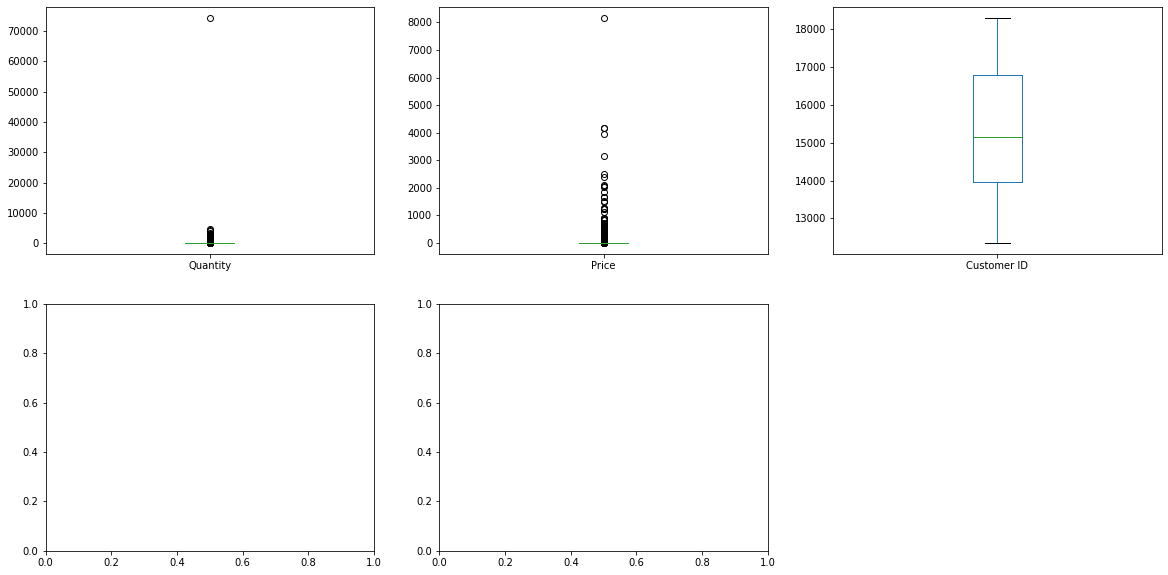

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))

for i,el in enumerate(numeric_column):
    a = df2.boxplot(el, ax=axes.flatten()[i],grid=False)

fig.delaxes(axes[1][2])
plt.show()

#### Quantity

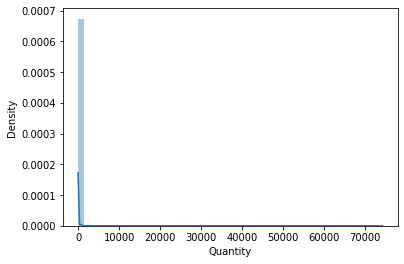

In [ ]:
#checking the outlier
sns.distplot(df2['Quantity'])

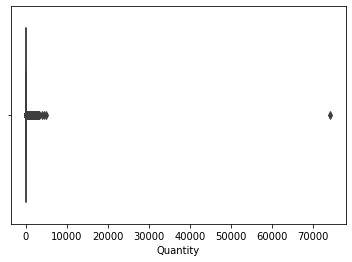

In [ ]:
sns.boxplot(x='Quantity', data=df2)

In [ ]:
df2.shape

(375666, 11)

In [ ]:
# get IQR for Quantity
Q1 = df2['Quantity'].quantile(0.25)
Q3 = df2['Quantity'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 2.0

Q3:
 12.0

IQR:
 10.0

Min:
 -13.0

Max:
 27.0


In [ ]:
df2 = df2[(df2["Quantity"] >= boxplot_min)&(df2["Quantity"] <= boxplot_max)]

In [ ]:
df2.shape

(351120, 11)

#### Price

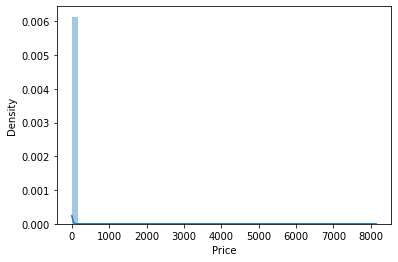

In [ ]:
#checking the outlier
sns.distplot(df2['Price'])

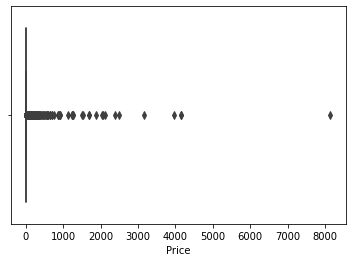

In [ ]:
sns.boxplot(x='Price', data=df2)

In [ ]:
df2.shape

(351120, 11)

In [ ]:
# get IQR for Price
Q1 = df2['Price'].quantile(0.25)
Q3 = df2['Price'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 1.25

Q3:
 3.75

IQR:
 2.5

Min:
 -2.5

Max:
 7.5


In [ ]:
df2 = df2[(df2["Price"] >= boxplot_min)&(df2["Price"] <= boxplot_max)]

In [ ]:
df2.shape

(318446, 11)

## Exploring the Data

### How many product sold every month?

In [ ]:
#Aggregating the Orders by Month
df2_agg_order= df2.groupby("InvoiceDateMonth").Quantity.sum()
df2_agg_order.head()

InvoiceDateMonth
2010-12    149998
2011-01    135676
2011-02    126919
2011-03    169486
2011-04    146710
Name: Quantity, dtype: int64

In [ ]:
#converting series to dataframe and resetting index.
df2_agg_order=pd.DataFrame(df2_agg_order)
df2_agg_order=df2_agg_order.reset_index()
df2_agg_order.head()

,InvoiceDateMonth,Quantity
0,2010-12,149998
1,2011-01,135676
2,2011-02,126919
3,2011-03,169486
4,2011-04,146710


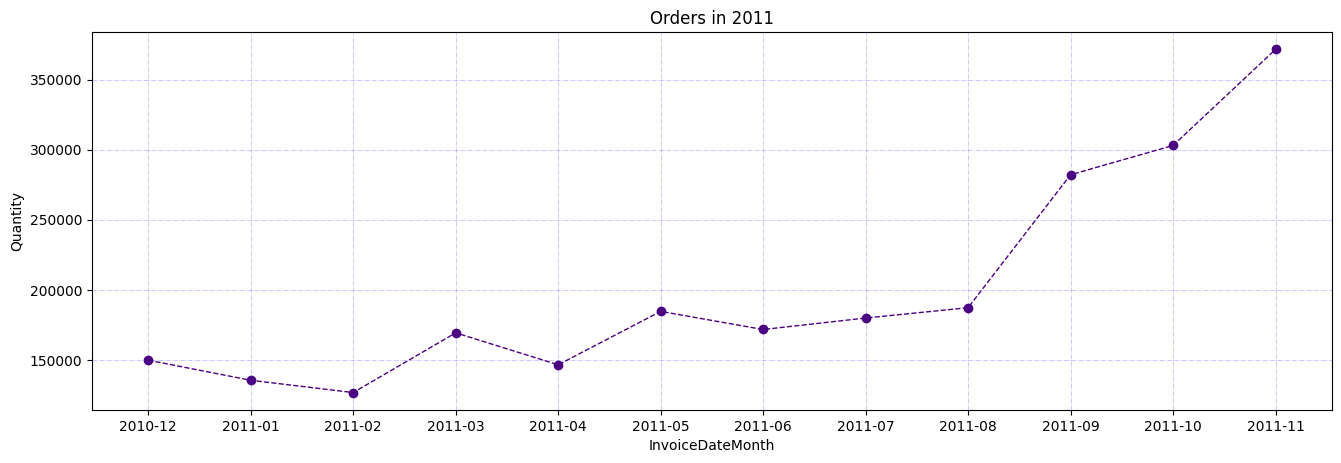

In [ ]:
def plot_df2(df1, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_df2(df2_agg_order, x=df2_agg_order.InvoiceDateMonth, y=df2_agg_order.Quantity,title='Orders in 2011')

***Product sold in November has the highest quantity that has around 15,42% product sold from all transaction along 1 year. Therefore the business team can increase sales in this month such as promoting new products to customers in this month.***

### How much customer spend their money every month?

In [ ]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order
df2['Revenue'] = df2['Quantity']*df2['Price']

In [ ]:
#Monthly Revenue
df2_revenue = df2.groupby(['InvoiceDateMonth'])['Revenue'].sum().reset_index()
df2_revenue.head()

,InvoiceDateMonth,Revenue
0,2010-12,284122.150
1,2011-01,232767.980
2,2011-02,219192.880
3,2011-03,285458.420
4,2011-04,242420.681


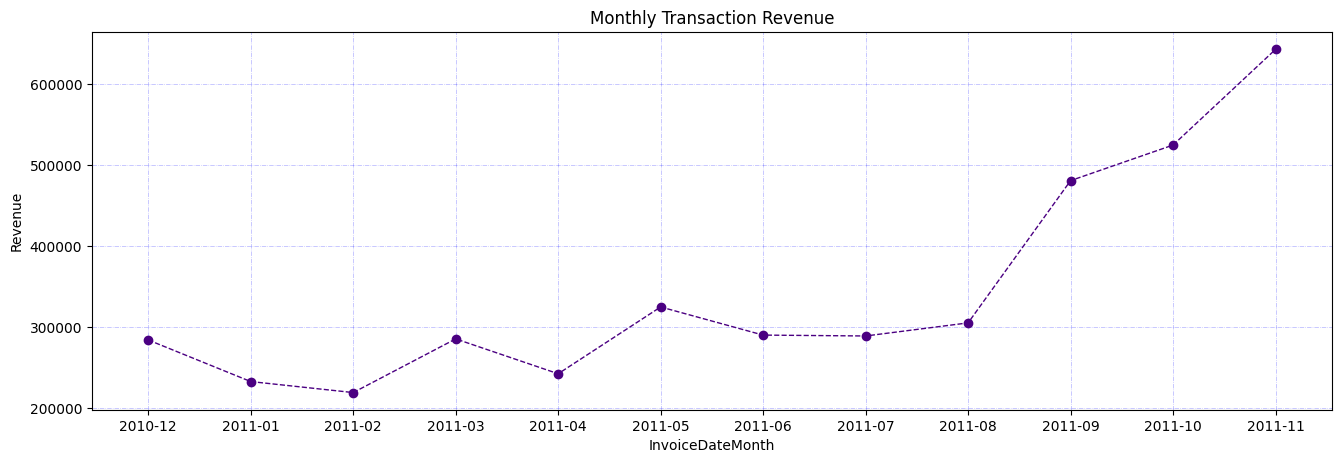

In [ ]:
def plot_df2_revenue(df2, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Revenue', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_df1_revenue(df2_revenue, x=df2_revenue.InvoiceDateMonth, y=df2_revenue.Revenue,title='Monthly Transaction Revenue')

**Revenue in November has the highest amount that has around 15,6% revenue from total revenue along 1 year. Therefore the business team can replicate the success of sales strategies in November to be implemented in other months.**

### How many customers make transactions each month?

In [ ]:
#Aggregating the Customers by Month
df2_Date= df2.groupby("InvoiceDateMonth")
df2_agg_customer=df2_Date['Customer ID'].count()
df2_agg_customer.head()

InvoiceDateMonth
2010-12    21677
2011-01    17454
2011-02    16379
2011-03    22447
2011-04    18822
Name: Customer ID, dtype: int64

In [ ]:
#converting series to dataframe and resetting index.
df2_agg_customer=pd.DataFrame(df2_agg_customer)
df2_agg_customer=df2_agg_customer.reset_index()
df2_agg_customer.head()

,InvoiceDateMonth,Customer ID
0,2010-12,21677
1,2011-01,17454
2,2011-02,16379
3,2011-03,22447
4,2011-04,18822


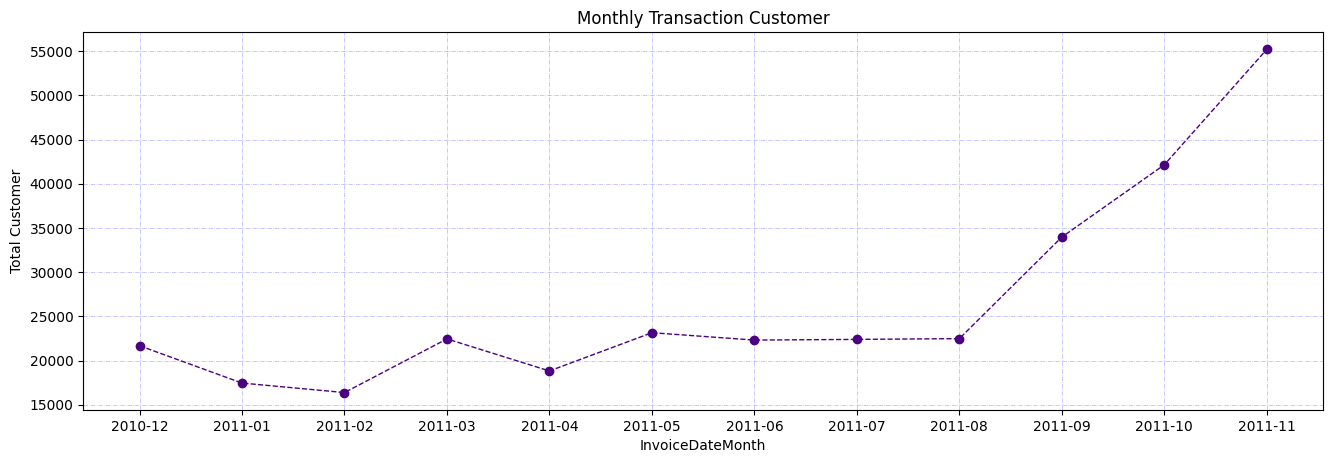

In [ ]:
def plot_df2_customer(df2, x, y, title="", xlabel='InvoiceDateMonth', ylabel='Total Customer', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='Indigo', linestyle='--', linewidth=1,marker='o')
    plt.grid(color='blue', alpha=0.3, linestyle='-.', linewidth=0.5)
    plt.show()
plot_df2_customer(df2_agg_customer, x=df2_agg_customer['InvoiceDateMonth'], y=df2_agg_customer['Customer ID'],title='Monthly Transaction Customer')

***The number of customers from December 2010 to November 2011 was fluctuating. However, in general, the number of customers almost every month tends to show an increase, only in January, February,and April do the number of customers show a decrease.The business team can provide special discounts in January, February,and April to increase the number of customers and sales in this month.***

### How much is the frequency of transactions in months, days, and hours?

#### Month

In [ ]:
#Frequency Transaction by Month
df2_Date_Month= df2.groupby("InvoiceDateMonth")
df2_month_invoice=df2_Date_Month['Invoice'].count()
df2_month_invoice.head()

InvoiceDateMonth
2010-12    21677
2011-01    17454
2011-02    16379
2011-03    22447
2011-04    18822
Name: Invoice, dtype: int64

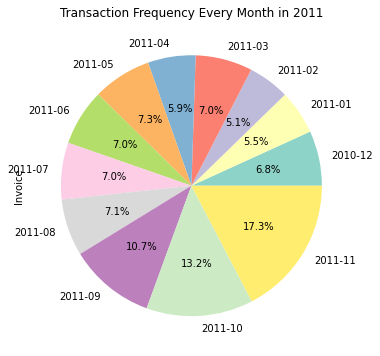

In [ ]:
df2_month_invoice=df2_Date_Month['Invoice'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Month in 2011')
plt.show()

***The number of customers in November is the highest number of customers that has around 17,3% of the total customers along 1 year. The business team can increase sales by promoting new products to customers in November.***

#### Day

In [ ]:
# Frequency Transaction by Day
df2_Date_Day= df2.groupby("InvoiceDateDay")
df2_day_invoice=df2_Date_Day['Invoice'].count()
df2_day_invoice

InvoiceDateDay
Fri    43653
Mon    51689
Sun    52758
Thu    62121
Tue    53176
Wed    55049
Name: Invoice, dtype: int64

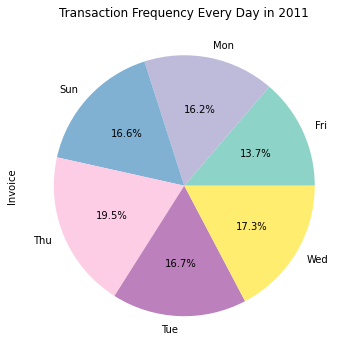

In [ ]:
df2_day_invoice=df2_Date_Day['Invoice'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Day in 2011')
plt.show()

***Most consumers make transactions on Thursday, which is around 19,5% of the total daily transactions. Business teams can increase sales by promoting new products to customers on Thursday.***

#### Hour

In [ ]:
# Frequency Transaction by Hour
df2_Date_Hour= df2.groupby("InvoiceDateHour")
df2_hour_invoice=df2_Date_Hour['Invoice'].count()
df2_hour_invoice.head()

InvoiceDateHour
06        1
07      178
08     6562
09    17037
10    29129
Name: Invoice, dtype: int64

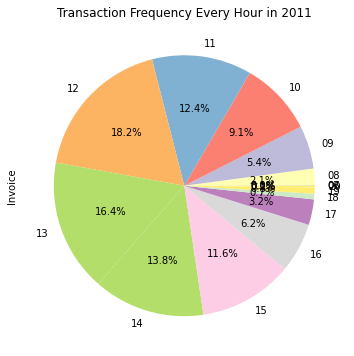

In [ ]:
df2_hour_invoice=df2_Date_Hour['Invoice'].count().plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.title('Transaction Frequency Every Hour in 2011')
plt.show()

***Most consumers order the products at 12 AM with a transaction amount of 18,2% of the total daily transactions. Business teams can increase sales by promoting new products to customers at 12 AM.***

### What products are the most popular?

In [ ]:
df2["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    1625
JUMBO BAG RED RETROSPOT               1291
PARTY BUNTING                         1249
LUNCH BAG RED RETROSPOT               1162
ASSORTED COLOUR BIRD ORNAMENT         1116
Name: Description, dtype: int64

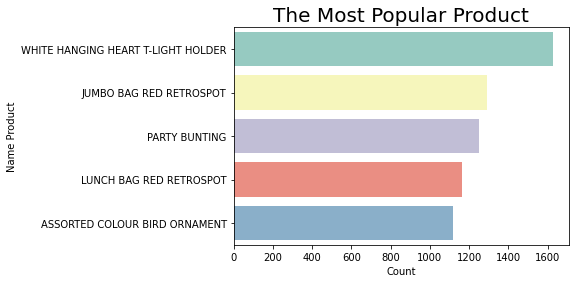

In [ ]:
df2["Description"].value_counts().head().plot(kind='barh').plot(kind='barh');
x = df2["Description"].value_counts().head()
sns.barplot(x = x.values, y = x.index,palette='Set3')
plt.title('The Most Popular Product', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Name Product');

***White Hanging Heart T-Light Holder became the product that was most in-demand by consumers in 2011. The number of purchases of White Hanging Heart T-Light reached 1625 units in 2011.The business team can provide special discounts from this product to attract more users.*** 

### Most consumers by country?

In [ ]:
df2['Country'].value_counts().head(5)

United Kingdom    286683
Germany             7185
France              6610
EIRE                5179
Spain               1976
Name: Country, dtype: int64

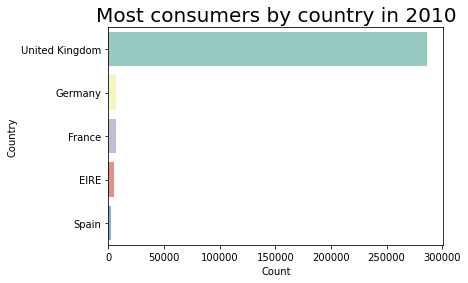

In [ ]:
x = df2['Country'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index,palette='Set3')
plt.title('Most consumers by country in 2010', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Country');

***The United Kingdom became the city with the highest number of customers in 2011. The total number of customers in United Kingdom reached 286683 (90%) customers in 2011. The business team can focus on promotions in the United Kingdom to increase sales.***

## RFM Analysis

**Recency, Frequency, Monetary Value (RFM) analysis method** is a method of customer analysis and segmentation based on customer habits. The variables used to perform RFM analysis are:

- Recency: How recently the customer made a transaction.
- Frequency: How often customers make transactions
- Monetary: How many transactions the customer has made

**In this case**, the dataset contains transaction data from 01/12/2009 to 01/12/2010, so the RFM Value is treated as follows:
- Recency: The difference between the last day the customer made a transaction and the day he did the analysis. In this case, the day of analysis uses the data of the last day of the transaction.
- Frequency: The number of transactions made by customers from 01/12/2009 to 01/12/2010.
- Monetary: Total order amount issued by customers from 01/12/2009 to 01/12/2010.

Here are the steps in creating an RFM model:

1. Calculate RFM Value
2. Calculate RFM Score
3. Calculate the total RFM score
4. Labeling

### 1. RFM Value

#### Recency

To find out the value recency, we must know the number of days the customer has been inactive (not making a purchase) since the last purchase.

In [ ]:
# create Dataframe rfm_table 
rfm_table2 = pd.DataFrame(df2['Customer ID'].unique())
rfm_table2.columns = ['Customer ID']
rfm_table2.head()

,Customer ID
0,17850.0
1,13047.0
2,12583.0
3,14688.0
4,17809.0


In [ ]:
# the latest purchase for every customer
latest_purchase = df2.groupby('Customer ID').InvoiceDate.max().reset_index()
latest_purchase.columns = ['Customer ID','LatestPurchaseDate']
latest_purchase.head()

,Customer ID,LatestPurchaseDate
0,12347.0,2011-10-31 12:25:00
1,12348.0,2011-04-05 10:47:00
2,12349.0,2011-11-21 09:51:00
3,12350.0,2011-02-02 16:01:00
4,12352.0,2011-11-03 14:37:00


In [ ]:
# Calculate Recency
# Recency = point in time of observation - number of days last purchase
latest_purchase['Recency'] = (latest_purchase['LatestPurchaseDate'].max() - latest_purchase['LatestPurchaseDate']).dt.days
latest_purchase.head()

,Customer ID,LatestPurchaseDate,Recency
0,12347.0,2011-10-31 12:25:00,30
1,12348.0,2011-04-05 10:47:00,239
2,12349.0,2011-11-21 09:51:00,9
3,12350.0,2011-02-02 16:01:00,301
4,12352.0,2011-11-03 14:37:00,27


In [ ]:
rfm_table2 = pd.merge(rfm_table2, latest_purchase[['Customer ID','Recency']], on='Customer ID')
rfm_table2.head()

,Customer ID,Recency
0,17850.0,363
1,13047.0,22
2,12583.0,9
3,14688.0,30
4,17809.0,7


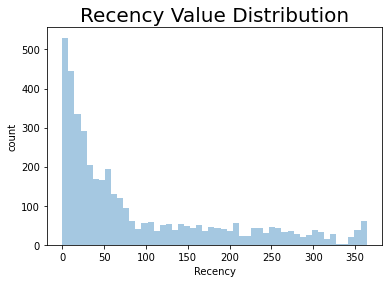

In [ ]:
# Recency value distribution
sns.distplot(rfm_table2['Recency'], kde=False, bins=50)
plt.title('Recency Value Distribution', fontsize = 20)
plt.xlabel('Recency')
plt.ylabel('count');

#### Frequency

In [ ]:
# Calculate Frequency
frequency = df2.groupby('Customer ID').InvoiceDate.count().reset_index()
frequency.columns = ['Customer ID','frequency']
frequency.head()

,Customer ID,frequency
0,12347.0,155
1,12348.0,6
2,12349.0,58
3,12350.0,16
4,12352.0,66


In [ ]:
rfm_table2 = pd.merge(rfm_table2,frequency, on='Customer ID')
rfm_table2

,Customer ID,Recency,frequency
0,17850.0,363,273
1,13047.0,22,149
2,12583.0,9,188
3,14688.0,30,251
4,17809.0,7,27
...,...,...,...
4148,18058.0,0,1
4149,12953.0,0,10
4150,12966.0,0,9
4151,15060.0,0,105


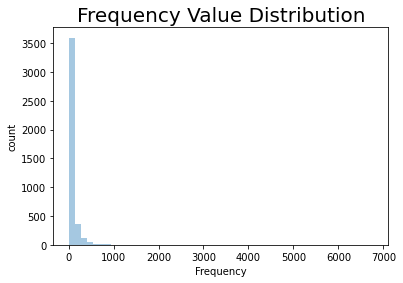

In [ ]:
# Frequency Value Distribution
sns.distplot(rfm_table2['frequency'], kde=False, bins=50)
plt.title('Frequency Value Distribution', fontsize = 20)
plt.xlabel('Frequency')
plt.ylabel('count');

#### Monetary

In [ ]:
# Calculate Monetary
monetary = df2.groupby('Customer ID').Revenue.sum().reset_index()
monetary.columns = ['Customer ID','monetary']
monetary.head()

,Customer ID,monetary
0,12347.0,3089.91
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94


In [ ]:
rfm_table2 = pd.merge(rfm_table2, monetary, on='Customer ID')
rfm_table2.head()

,Customer ID,Recency,frequency,monetary
0,17850.0,363,273,4462.16
1,13047.0,22,149,2646.26
2,12583.0,9,188,4765.36
3,14688.0,30,251,3444.50
4,17809.0,7,27,729.45


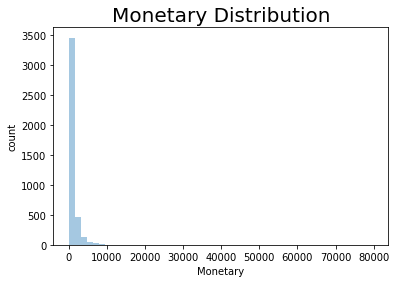

In [ ]:
# Monetary Value Distribution
sns.distplot(rfm_table2['monetary'], kde=False, bins=50)
plt.title('Monetary Distribution', fontsize = 20)
plt.xlabel('Monetary')
plt.ylabel('count');

### 2. RFM Score

The calculation of the individual RFM Score can be done using the Quartile statistical method (dividing the Score into four parts).

The steps is: 
1. Split the metrics into segments using quantiles.
2. We assign a score from 1 to 4 to Recency, Frequency and Monetary.
3. Four is the best/highest value, and one is the lowest/worst value.

In [ ]:
quartiles = rfm_table2.quantile(q=[0.25, 0.5, 0.75])
quartiles

,Customer ID,Recency,frequency,monetary
0.25,13813.0,16.0,14.0,203.86
0.50,15286.0,48.0,34.0,451.25
0.75,16774.0,145.0,84.0,1103.39


In [ ]:
segmented_rfm2 = rfm_table2.copy()

In [ ]:
def recency_score (data):
    if data <= 16:
        return 4
    elif data <= 49:
        return 3
    elif data <= 145:
        return 2
    else:
        return 1

def frequency_score (data):
    if data <= 13:
        return 1
    elif data <= 33:
        return 2
    elif data <= 81:
        return 3
    else:
        return 4
def monetary_value_score (data):
    if data <= 186.0225:
        return 1
    elif data <= 420.2000:
        return 2
    elif data <= 1019.6975:
        return 3
    else:
        return 4

segmented_rfm2['R'] = segmented_rfm2['Recency'].apply(recency_score )
segmented_rfm2['F'] = segmented_rfm2['frequency'].apply(frequency_score)
segmented_rfm2['M'] = segmented_rfm2['monetary'].apply(monetary_value_score)
segmented_rfm2.head()

,Customer ID,Recency,frequency,monetary,R,F,M
0,17850.0,363,273,4462.16,1,4,4
1,13047.0,22,149,2646.26,3,4,4
2,12583.0,9,188,4765.36,4,4,4
3,14688.0,30,251,3444.50,3,4,4
4,17809.0,7,27,729.45,4,2,3


- Best Recency score = 4: purchased very recently. 
- Best Frequency score = 4: highest quantity purchases. 
- Best Monetary score = 4: spent the most.



### 3. Total RFM Score

A total RFM score is calculated simply by combining individual RFM score numbers.

In [ ]:
segmented_rfm2['RFM_score'] =segmented_rfm2[['R', 'F', 'M']].sum(axis=1)
segmented_rfm2.head()

,Customer ID,Recency,frequency,monetary,R,F,M,RFM_score
0,17850.0,363,273,4462.16,1,4,4,9
1,13047.0,22,149,2646.26,3,4,4,11
2,12583.0,9,188,4765.36,4,4,4,12
3,14688.0,30,251,3444.50,3,4,4,11
4,17809.0,7,27,729.45,4,2,3,9


In [ ]:
segmented_rfm2['RFM_Segment'] = segmented_rfm2.R.map(str)+segmented_rfm2.F.map(str)+segmented_rfm2.M.map(str)
segmented_rfm2.head()

,Customer ID,Recency,frequency,monetary,R,F,M,RFM_score,RFM_Segment
0,17850.0,363,273,4462.16,1,4,4,9,144
1,13047.0,22,149,2646.26,3,4,4,11,344
2,12583.0,9,188,4765.36,4,4,4,12,444
3,14688.0,30,251,3444.50,3,4,4,11,344
4,17809.0,7,27,729.45,4,2,3,9,423


### 4. Labelling

In [ ]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm2)

for i in range(0,len(segmented_rfm2)):

    if segmented_rfm2['RFM_Segment'][i] == '444':
        label[i] = "Best Customers"
        
    elif segmented_rfm2['RFM_Segment'][i] == '334'or segmented_rfm2['RFM_Segment'][i] == '441'or segmented_rfm2['RFM_Segment'][i] == '442'or segmented_rfm2['RFM_Segment'][i] == '244'or segmented_rfm2['RFM_Segment'][i] == '343'or segmented_rfm2['RFM_Segment'][i] == '344'or segmented_rfm2['RFM_Segment'][i] == '433'or segmented_rfm2['RFM_Segment'][i] == '434'or segmented_rfm2['RFM_Segment'][i] == '443':
        label[i] = "Loyal Custumers"
        
    elif segmented_rfm2['RFM_Segment'][i] == '311'or segmented_rfm2['RFM_Segment'][i] == '324'or segmented_rfm2['RFM_Segment'][i] == '341'or segmented_rfm2['RFM_Segment'][i] == '342'or segmented_rfm2['RFM_Segment'][i] == '314'or segmented_rfm2['RFM_Segment'][i] == '414'or segmented_rfm2['RFM_Segment'][i] == '424'or segmented_rfm2['RFM_Segment'][i] == '312' or segmented_rfm2['RFM_Segment'][i] == '313' or segmented_rfm2['RFM_Segment'][i] == '321'or segmented_rfm2['RFM_Segment'][i] == '322'or segmented_rfm2['RFM_Segment'][i] == '323'or segmented_rfm2['RFM_Segment'][i] == '331'or segmented_rfm2['RFM_Segment'][i] == '332'or segmented_rfm2['RFM_Segment'][i] == '333'or segmented_rfm2['RFM_Segment'][i] == '411'or segmented_rfm2['RFM_Segment'][i] == '412'or segmented_rfm2['RFM_Segment'][i] == '413'or segmented_rfm2['RFM_Segment'][i] == '421'or segmented_rfm2['RFM_Segment'][i] == '422'or segmented_rfm2['RFM_Segment'][i] == '423'or segmented_rfm2['RFM_Segment'][i] == '431'or segmented_rfm2['RFM_Segment'][i] == '432':
        label[i] = "Potential Costumers"

    elif segmented_rfm2['RFM_Segment'][i] == '222'or segmented_rfm2['RFM_Segment'][i] == '223'or segmented_rfm2['RFM_Segment'][i] == '232'or segmented_rfm2['RFM_Segment'][i] == '233'or segmented_rfm2['RFM_Segment'][i] == '113'or segmented_rfm2['RFM_Segment'][i] == '114'or segmented_rfm2['RFM_Segment'][i] == '131'or segmented_rfm2['RFM_Segment'][i] == '141'or segmented_rfm2['RFM_Segment'][i] == '213'or segmented_rfm2['RFM_Segment'][i] == '214'or segmented_rfm2['RFM_Segment'][i] == '231'or segmented_rfm2['RFM_Segment'][i] == '214'or segmented_rfm2['RFM_Segment'][i] == '231'or segmented_rfm2['RFM_Segment'][i] == '241'or segmented_rfm2['RFM_Segment'][i] == '243':
        label[i] = "Customers Needing Attention"
    
    elif segmented_rfm2['RFM_Segment'][i] == '144'or segmented_rfm2['RFM_Segment'][i] == '244'or segmented_rfm2['RFM_Segment'][i] == '143'or segmented_rfm2['RFM_Segment'][i] == '134':
        label[i] = "Cant' Lose Them"

    elif segmented_rfm2['RFM_Segment'][i] == '121'or segmented_rfm2['RFM_Segment'][i] == '122'or segmented_rfm2['RFM_Segment'][i] == '112'or segmented_rfm2['RFM_Segment'][i] == '212'or segmented_rfm2['RFM_Segment'][i] == '211'or segmented_rfm2['RFM_Segment'][i] == '221'or segmented_rfm2['RFM_Segment'][i] == '222'or segmented_rfm2['RFM_Segment'][i] == '123'or segmented_rfm2['RFM_Segment'][i] == '124'or segmented_rfm2['RFM_Segment'][i] == '132'or segmented_rfm2['RFM_Segment'][i] == '133'or segmented_rfm2['RFM_Segment'][i] == '134'or segmented_rfm2['RFM_Segment'][i] == '142'or segmented_rfm2['RFM_Segment'][i] == '224'or segmented_rfm2['RFM_Segment'][i] == '242':
        label[i] = "At Risk Customers"

    elif segmented_rfm2['RFM_Segment'][i] == '111':
        label[i] = "Lost Customers"
        
    else:
        label[i] = "Others"

In [ ]:
segmented_rfm2['label'] = label
segmented_rfm2

,Customer ID,Recency,frequency,monetary,R,F,M,RFM_score,RFM_Segment,label
0,17850.0,363,273,4462.16,1,4,4,9,144,Cant' Lose Them
1,13047.0,22,149,2646.26,3,4,4,11,344,Loyal Custumers
2,12583.0,9,188,4765.36,4,4,4,12,444,Best Customers
3,14688.0,30,251,3444.50,3,4,4,11,344,Loyal Custumers
4,17809.0,7,27,729.45,4,2,3,9,423,Potential Costumers
...,...,...,...,...,...,...,...,...,...,...
4148,18058.0,0,1,6.96,4,1,1,6,411,Potential Costumers
4149,12953.0,0,10,192.45,4,1,2,7,412,Potential Costumers
4150,12966.0,0,9,147.68,4,1,1,6,411,Potential Costumers
4151,15060.0,0,105,252.14,4,4,2,10,442,Loyal Custumers


In [ ]:
# Count the frequency that a value occurs in a dataframe column for the labels.
segmented_rfm2['label'].value_counts()

Potential Costumers            958
At Risk Customers              887
Loyal Custumers                854
Customers Needing Attention    542
Best Customers                 423
Lost Customers                 358
Others                          71
Cant' Lose Them                 60
Name: label, dtype: int64

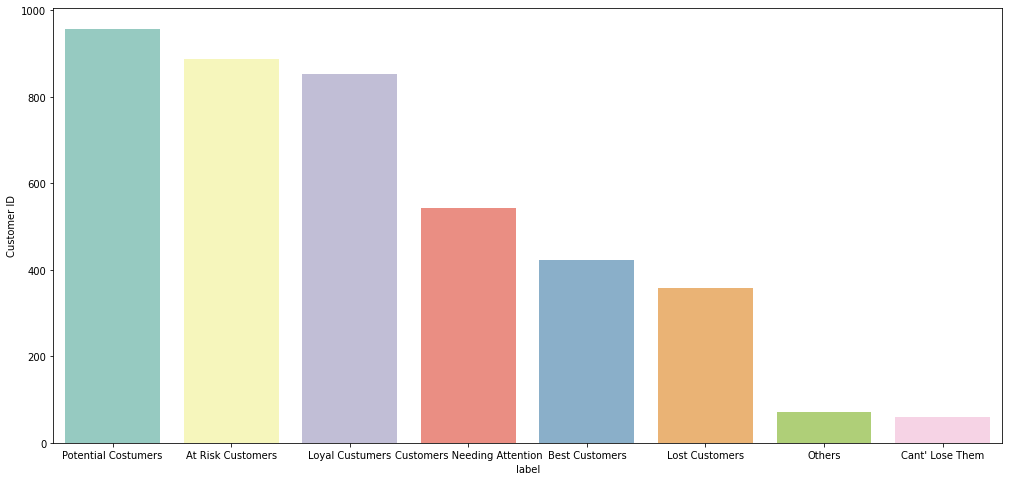

In [ ]:
segmentation2=segmented_rfm2.groupby('label')['Customer ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,8))
segmentation2.drop([0],inplace=False)
sns.barplot(data=segmentation2, x="label", y="Customer ID", palette = "Set3");

## K-Means Clustering

We have segmented customers based on RFM values to make a different and optimal approach with **the Quantile Method**. However, this RFM segmentation process can also be done by scoring or the original value using **Machine Learning techniques.**

Machine learning methods can be used for segmentation and are familiarly known as Unsupervised Machine Learning. **The Unsupervised Machine Learning** approach will study data patterns and then group each data into unique clusters. 

**K-Means clustering algorithm** is an unsupervised machine learning algorithm that uses multiple iterations to segment the unlabeled data points into K different clusters in a way such that each data point belongs to only a single group that has similar properties.

In [ ]:
# create Dataframe new_rfm1 
new_rfm2 = rfm_table2.drop('Customer ID', axis=1)
new_rfm2.head()

,Recency,frequency,monetary
0,363,273,4462.16
1,22,149,2646.26
2,9,188,4765.36
3,30,251,3444.50
4,7,27,729.45


### **K-means gives the best result under the following conditions:**

1. Data’s distribution is not skewed.
2. Data is standardised (i.e. mean of 0 and standard deviation of 1).

In [ ]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.211697675582521, : SkewtestResult(statistic=25.540440324520404, pvalue=7.012019792632263e-144)
frequency's: Skew: 18.482427958806987, : SkewtestResult(statistic=82.22323131750831, pvalue=0.0)
monetary's: Skew: 17.06982776309565, : SkewtestResult(statistic=80.50941788624849, pvalue=0.0)


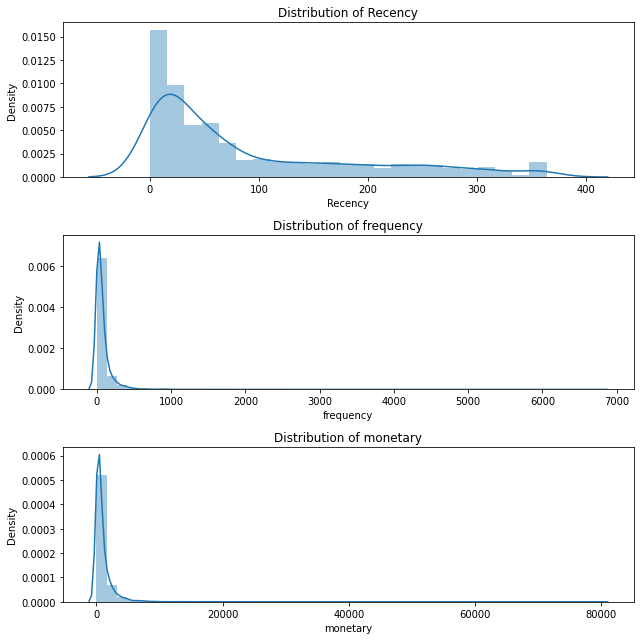

In [ ]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(new_rfm2,'Recency')

plt.subplot(3, 1, 2)
check_skew(new_rfm2,'frequency')

plt.subplot(3, 1, 3)
check_skew(new_rfm2,'monetary')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

The data is highly skewed,therefore we will perform log transformations to reduce the skewness of each variable.I add a small constant as log transformation demands all the values to be positive.

In [ ]:
df_rfm_log = new_rfm2.copy()

Recency's: Skew: -0.53947008589681, : SkewtestResult(statistic=-13.350306385721554, pvalue=1.1796274102099212e-40)
frequency's: Skew: 0.04537074273840125, : SkewtestResult(statistic=1.1951967419163403, pvalue=0.23201017120700484)
monetary's: Skew: -0.09193495446240481, : SkewtestResult(statistic=-2.4180077723014928, pvalue=0.015605743476773912)


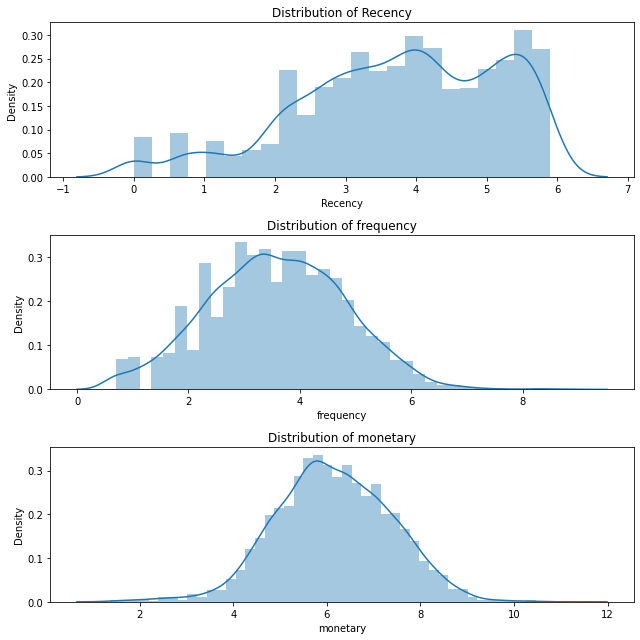

In [ ]:
df_rfm_log = np.log(df_rfm_log+1)
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'monetary')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [ ]:
new_rfm2.describe()

,Recency,frequency,monetary
count,4153.000000,4153.000000,4153.000000
mean,90.583193,76.678546,992.547660
std,98.576784,189.627338,2089.745165
min,0.000000,1.000000,2.900000
25%,16.000000,14.000000,203.860000
50%,48.000000,34.000000,451.250000
75%,145.000000,84.000000,1103.390000
max,364.000000,6771.000000,79836.360000


In [ ]:
scaler = StandardScaler()
scaler.fit(df_rfm_log)
RFM_scaled2 = scaler.transform(df_rfm_log)

In [ ]:
RFM_scaled2 = pd.DataFrame(RFM_scaled2, columns=df_rfm_log.columns)
RFM_scaled2

,Recency,frequency,monetary
0,1.500678,1.658987,1.824335
1,-0.439950,1.167832,1.402513
2,-1.025238,1.356236,1.877413
3,-0.230198,1.590755,1.615344
4,-1.182042,-0.200430,0.362663
...,...,...,...
4148,-2.643273,-2.351798,-3.286955
4149,-2.643273,-0.962082,-0.710314
4150,-2.643273,-1.039779,-0.922886
4151,-2.643273,0.884797,-0.493138


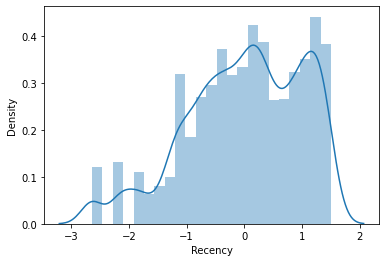

In [ ]:
#Analyze distribution
sns.distplot(RFM_scaled2['Recency'])

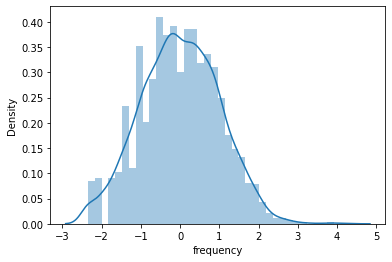

In [ ]:
sns.distplot(RFM_scaled2['frequency'])

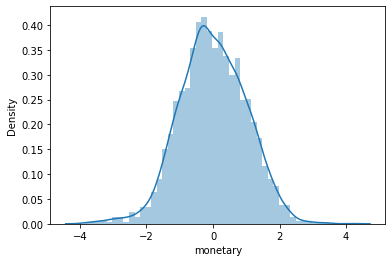

In [ ]:
sns.distplot(RFM_scaled2['monetary'])

### Finding the optimal number of clusters

In [ ]:
X = np.asarray(RFM_scaled2)

In [ ]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_scaled1) 
    kmeanModel.fit(RFM_scaled1)     
      
    distortions.append(sum(np.min(cdist(RFM_scaled1, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_scaled1.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_scaled1, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_scaled1.shape[0] 
    mapping2[k] = kmeanModel.inertia_

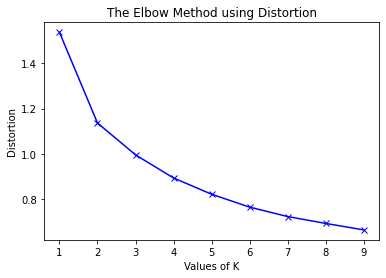

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

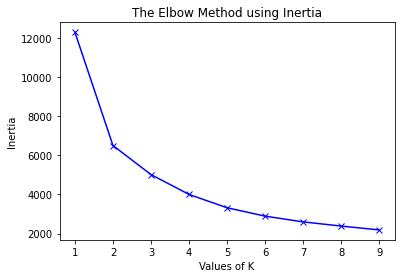

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

The cluster value where this decrease in distortion value and inertia value becomes constant can be chosen as the right cluster value for our data. Looking at the above elbow curve, we can choose any number of clusters between 3 to 5.

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
    # Extract cluster labels
    cluster_labels = kmeans.labels_
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    return df_new

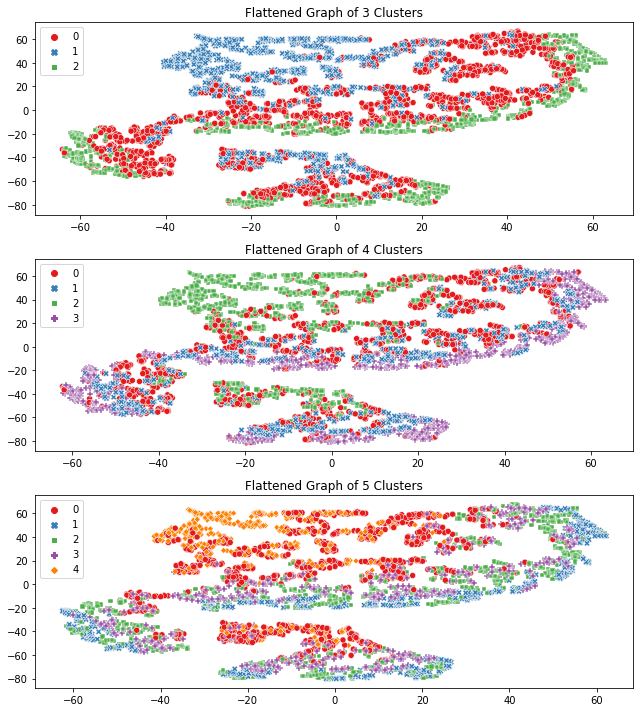

In [ ]:
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_scaled2, 3, rfm_table2)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_scaled2, 4, rfm_table2)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_scaled2, 5, rfm_table2)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=rfm_table2.index, 
                                       columns=rfm_table2.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['Customer ID', 'Cluster'],
                        value_vars=['Recency', 'frequency', 'monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

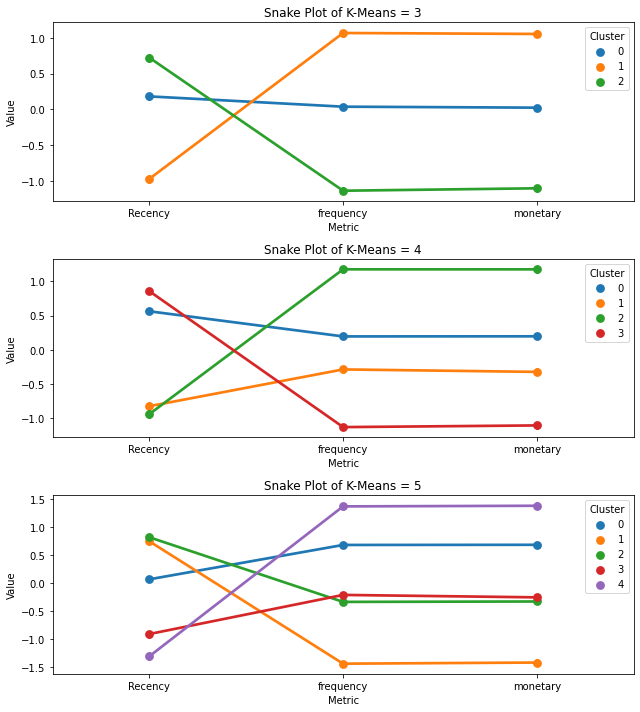

In [ ]:
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_scaled2, df_rfm_k3, rfm_table2)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_scaled2, df_rfm_k4, rfm_table2)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_scaled2, df_rfm_k5, rfm_table2)

plt.tight_layout()

From the flattened graphs and the snake plots it is evident that having a cluster value of 4,segments our customers well. We could also go for higher number of clusters, it completely depends on how the company wants to segment their customers.

### Evaluating Model

#### Davies Bouldin Score

Davies Bouldin Score is a metric for evaluating clustering algorithms.

The **smaller** Davies Bouldin Score is The more optimal the cluster.

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

1.08877778576323


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

0.9826430427891266


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(davies_bouldin_score(X, kmeans.labels_))

1.0135766890074092


K-Means with 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

#### Silhouetter Score

Silhoutter Score is a metric for evaluating clustering algorithms. 

The **higher** Silhouuter Score is the more optimal the cluster.

In [ ]:
km = KMeans(n_clusters=3)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.306


In [ ]:
km = KMeans(n_clusters=4)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.4f' % score)

Silhouetter Score: 0.3176


In [ ]:
km = KMeans(n_clusters=5)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.5f' % score)

Silhouetter Score: 0.29517


In [ ]:
km = KMeans(n_clusters=6)
# Fit the KMeans model
km.fit_predict(X)
# Calculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.6f' % score)

Silhouetter Score: 0.294811


K-Means with 4 clusters has higher Silhoutter score than other cluster. Therefore the optimum cluster is 4.

### Interpretation of the clusters formed using K-Means

Based on Elbow Method, Davies Bouldin Score, and Silhoutter Score the optimum cluster is 4.

In [ ]:
df_rfm_k4.head()

,Customer ID,Recency,frequency,monetary,Cluster
0,17850.0,363,273,4462.16,0
1,13047.0,22,149,2646.26,2
2,12583.0,9,188,4765.36,2
3,14688.0,30,251,3444.50,2
4,17809.0,7,27,729.45,1


In [ ]:
df_rfm_k4.Cluster.value_counts()

0    1226
3    1098
2    1044
1     785
Name: Cluster, dtype: int64

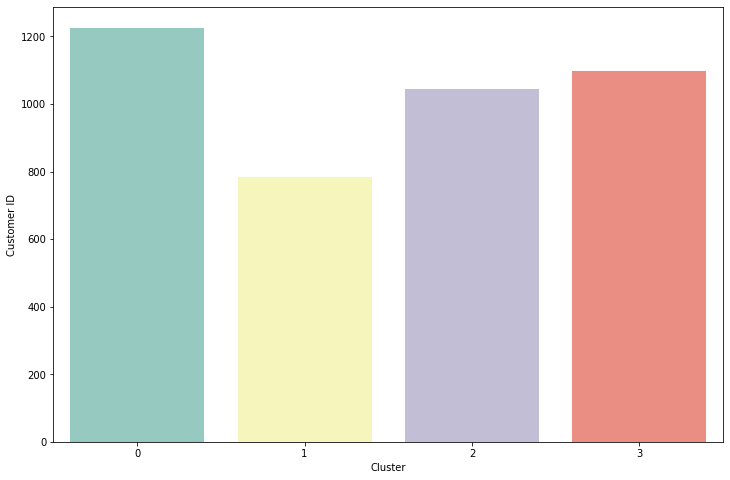

In [ ]:
sq1=df_rfm_k4.groupby('Cluster')['Customer ID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="Customer ID", palette = "Set3");

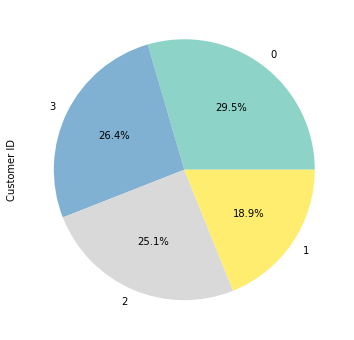

In [ ]:
sq1=df_rfm_k4.groupby('Cluster')['Customer ID'].nunique().sort_values(ascending=False).plot(kind='pie',cmap='Set3',figsize=(6,6),autopct='%1.1f%%')
plt.show()

- "Cluster 0" has 29.5% customers.
- "Cluster 1" has 18.9% customers. 
- "Cluster 2" has 25.1% customers. 
- "Cluster 3" has 26.4% customers. 

In [ ]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean']
    }).round(0)
    return df_new

In [ ]:
rfm_values(df_rfm_k4).reset_index()

,Cluster,Recency,frequency,monetary
,,mean,mean,mean
0,0,119.0,53.0,705.0
1,1,17.0,30.0,376.0
2,2,17.0,209.0,2682.0
3,3,181.0,10.0,148.0


In [ ]:
# Cluster 0
Cluster0=recency_score(20),frequency_score(201),monetary_value_score(2458.0)
sum(Cluster0)
print(Cluster0,
      'Loyal Customers')

(3, 4, 4) Loyal Customers


In [ ]:
#Cluster 1
Cluster1=recency_score(130),frequency_score(44),monetary_value_score(563)
print(Cluster1,
      'Customers Needing Attention')

(2, 3, 3) Customers Needing Attention


In [ ]:
#Cluster 2 	
Cluster2=recency_score(15),frequency_score(33),monetary_value_score(398)
print(Cluster2,
      'Potential Loyalist')

(4, 2, 2) Potential Loyalist


In [ ]:
# Cluster 3
Cluster3=recency_score(174),frequency_score(8),monetary_value_score(120)
print(Cluster3,
      'Lost Customers')

(1, 1, 1) Lost Customers


- Cluster 0 => **Loyal Customers** => Spend good money with us often and 
responsive to promotions.	

- Cluster 1 => **Customer Need Attention** => Above average recency, frequency and monetary values. May not have bought very recently though.

- Cluster 2 => **Potential Loyalist** => Recent customers, but spent a good amount and bought more than once.

- Cluster 3 => **Lost Customer => Last purchase was long back, low spenders and low number of orders.**

## Recommendation


Based on the 4 clusters, we could formulate **marketing strategies** relevant to each cluster: 
1.	Cluster 0 => **Loyal Customers** => Upsell higher value products, ask for reviews, and engage them.
2.	Cluster 1 =>  **Customer Need Attention** => Make limited time offers, recommend based on past purchases, share valuable resources, recommend popular products / renewals at discount, and reconnect with them.
3.	Cluster 2 => **Potential Loyalist** => Offer membership / loyalty program, and recommend other products.
4.	Cluster 3 =>  **Lost Customer** => Revive interest with reach out campaign, ignore otherwise, offer other relevant products and special discounts, and recreate brand value.
